# Library

In [6]:
import pandas as pd
import os

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from scipy import stats
import xport

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVR, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support

sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)
import warnings
warnings.filterwarnings('ignore') 


from pandas.plotting import scatter_matrix

from sklearn.metrics import average_precision_score

C:\Users\zhezh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\

# Import data

In [7]:
# function:  rename_chosen_features(xpt_file,old_names,new_names,csv_file)
# purpose:   rename the chosen features in the XPT file
# input:     xpt_file: the converted dataframe from XPT file
#            old_names: a list of strings - strings are code names on NHANES 
#            new_names: a list of strings 
#            csv_file: name 
# output:    a dataframe with renamed chosen features  

def rename_chosen_features(xpt_file,old_names,new_names,csv_file):
    df = xpt_file[old_names]        
    df.columns = new_names                
    # xpt_file.to_csv(csv_file, header=False) # if needs to get a csv file from the original xpt file
    return df

In [8]:
os.chdir('C:/Users/zhezh/')


 
DIQ_xpt_file = pd.read_sas('DIQ_I1516.XPT')
DIQ_cvs_file = 'Diabetes1516.csv'
# DIQ010: doctor told you have diabetes
DIQ_old_names = ['SEQN','DIQ010'] 
DIQ_new_names = ['ID','diabetes']
df0_DIQ = rename_chosen_features(DIQ_xpt_file,DIQ_old_names,DIQ_new_names,DIQ_cvs_file)

## Demographics
DEMO_xpt_file = pd.read_sas('DEMO_I1516.XPT')
DEMO_cvs_file = 'Demographic1516.csv'
# RIAGENDR: gender - codes
# RIDRETH3: race/Hispanic origin w/ NH Asian - codes
# RIDAGEYR: age in years at screening - values & codes: 0 to 79 & 80
DEMO_old_names = ['SEQN','RIAGENDR','RIDRETH3','RIDAGEYR']
DEMO_new_names = ['ID','gender','race','age']
df0_DEMO = rename_chosen_features(DEMO_xpt_file,DEMO_old_names,DEMO_new_names,DEMO_cvs_file)

## Plasma Fasting Glucose
GLU_xpt_file = pd.read_sas('GLU_I1516.XPT')
GLU_cvs_file = 'FastingGlucose1516.csv'
# LBDGLUSI: Fasting Glucose (mmol/L) 
GLU_old_names = ['SEQN','LBDGLUSI'] 
GLU_new_names = ['ID','fasting_glucose']
df0_GLU = rename_chosen_features(GLU_xpt_file,GLU_old_names,GLU_new_names,GLU_cvs_file)

## Insulin
INS_xpt_file = pd.read_sas('INS_I1516.XPT')
INS_cvs_file = 'Insulin1516.csv'
# LBDINSI : Insulin (pmol/L) 
INS_old_names = ['SEQN','LBDINSI'] 
INS_new_names = ['ID','insulin']
df0_INS = rename_chosen_features(INS_xpt_file, INS_old_names, INS_new_names,INS_cvs_file)


## Alcohol Use
ALQ_xpt_file = pd.read_sas('ALQ_I1516.XPT')
ALQ_cvs_file = 'AlcoholUse1516.csv'
# ALQ101: Had at least 12 alcohol drinks/1 yr? - codes
# ALQ151: Ever have 4/5 or more drinks every day? - codes
# ALQ160: # days have 4/5 or more drinks in 2 hrs? - codes & values

# ALQ120Q : How often drink alcohol over past 12 mos
ALQ_old_names = ['SEQN', 'ALQ120Q'] 
ALQ_new_names = ['ID', 'alc_days_year']
df0_ALQ = rename_chosen_features(ALQ_xpt_file,ALQ_old_names,ALQ_new_names,ALQ_cvs_file)

## Cholesterol - LDL
TRIGLY_xpt_file = pd.read_sas('TRIGLY_I1516.XPT')
TRIGLY_cvs_file = 'Cholesterol1516.csv'
# LBDLDLSI : LDL-cholesterol (mmol/L) - values: 23 to 277
TRIGLY_old_names = ['SEQN','LBDLDLSI']  
TRIGLY_new_names = ['ID','LDL']
df0_TRIGLY = rename_chosen_features(TRIGLY_xpt_file,TRIGLY_old_names,TRIGLY_new_names,TRIGLY_cvs_file)

## Cholesterol - HDL
HDL_xpt_file = pd.read_sas('HDL_I1516.XPT')
HDL_cvs_file = 'HDL1516.csv'
# LBDHDDSI : HDL - Cholesterol (mmol/L) 
HDL_old_names = ['SEQN','LBDHDDSI'] 
HDL_new_names = ['ID','HDL']
df0_HDL = rename_chosen_features(HDL_xpt_file, HDL_old_names, HDL_new_names, HDL_cvs_file)

## Blood Pressure
BPX_xpt_file = pd.read_sas('BPX_I1516.XPT')
BPX_cvs_file = 'BloodPressure1516.csv'
# BPXSY1: Systolic: Blood pres (1st rdg) mm Hg - values: 72 to 236
# BPXDI1: Diastolic: Blood pres (1st rdg) mm Hg - values: 0 to 120
# BPXSY2: Systolic: Blood pres (2nd rdg) mm Hg - values: 76 to 238
# BPXDI2: Diastolic: Blood pres (2nd rdg) mm Hg - values: 0 to 144
# BPXSY3 - Systolic: Blood pres (3rd rdg) mm Hg - values: 76 to 226 
# BPXDI3 - Diastolic: Blood pres (3rd rdg) mm Hg - values: 0 to 140
BPX_old_names = ['SEQN','BPXSY1','BPXDI1','BPXSY2','BPXDI2','BPXSY3','BPXDI3']  
BPX_new_names = ['ID','sysBP1', 'diaBP1','sysBP2', 'diaBP2','sysBP3', 'diaBP3']
df0_BPX = rename_chosen_features(BPX_xpt_file,BPX_old_names,BPX_new_names,BPX_cvs_file)

## Body Measures
BMX_xpt_file = pd.read_sas('BMX_I1516.XPT')
BMX_cvs_file = 'BMI1516.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_old_names = ['SEQN','BMXBMI']  
BMX_new_names = ['ID','BMI']
df0_BMX = rename_chosen_features(BMX_xpt_file,BMX_old_names,BMX_new_names,BMX_cvs_file)

## Total Dietary Supplements 
DSQTOT_xpt_file = pd.read_sas('DSQTOT_I1516.XPT')
DSQTOT_cvs_file = 'Sugar1516.csv'
# DSQTSUGR - Total sugars (gm) - values: 0.02 to 45.73 (in 30 days)
DSQTOT_old_names = ['SEQN','DSQTSUGR']  
DSQTOT_new_names = ['ID','sugar']
df0_DSQTOT = rename_chosen_features(DSQTOT_xpt_file,DSQTOT_old_names,DSQTOT_new_names,DSQTOT_cvs_file)


DIQ_xpt_file = pd.read_sas('DIQ_H1314.XPT')
DIQ_cvs_file = 'Diabetes1314.csv'
# DIQ010: doctor told you have diabetes
DIQ_old_names = ['SEQN','DIQ010'] 
DIQ_new_names = ['ID','diabetes']
df1_DIQ = rename_chosen_features(DIQ_xpt_file,DIQ_old_names,DIQ_new_names,DIQ_cvs_file)

## Demographics
DEMO_xpt_file = pd.read_sas('DEMO_H1314.XPT')
DEMO_cvs_file = 'Demographic1314.csv'
# RIAGENDR: gender - codes
# RIDRETH3: race/Hispanic origin w/ NH Asian - codes
# RIDAGEYR: age in years at screening - values & codes: 0 to 79 & 80
DEMO_old_names = ['SEQN','RIAGENDR','RIDRETH3','RIDAGEYR']
DEMO_new_names = ['ID','gender','race','age']
df1_DEMO = rename_chosen_features(DEMO_xpt_file,DEMO_old_names,DEMO_new_names,DEMO_cvs_file)

## Plasma Fasting Glucose
GLU_xpt_file = pd.read_sas('GLU_H1314.XPT')
GLU_cvs_file = 'FastingGlucose1314.csv'
# LBDGLUSI: Fasting Glucose (mmol/L) 
GLU_old_names = ['SEQN','LBDGLUSI'] 
GLU_new_names = ['ID','fasting_glucose']
df1_GLU = rename_chosen_features(GLU_xpt_file,GLU_old_names,GLU_new_names,GLU_cvs_file)


## Alcohol Use
ALQ_xpt_file = pd.read_sas('ALQ_H1314.XPT')
ALQ_cvs_file = 'AlcoholUse1314.csv'
# ALQ101: Had at least 12 alcohol drinks/1 yr? - codes
# ALQ151: Ever have 4/5 or more drinks every day? - codes
# ALQ160: # days have 4/5 or more drinks in 2 hrs? - codes & values

# ALQ120Q : How often drink alcohol over past 12 mos
ALQ_old_names = ['SEQN', 'ALQ120Q'] 
ALQ_new_names = ['ID', 'alc_days_year']
df1_ALQ = rename_chosen_features(ALQ_xpt_file,ALQ_old_names,ALQ_new_names,ALQ_cvs_file)

## Insulin
INS_xpt_file = pd.read_sas('INS_H1314.XPT')
INS_cvs_file = 'Insulin1314.csv'
# LBDINSI : Insulin (pmol/L) 
INS_old_names = ['SEQN','LBDINSI'] 
INS_new_names = ['ID','insulin']
df1_INS = rename_chosen_features(INS_xpt_file, INS_old_names, INS_new_names,INS_cvs_file)

## Cholesterol - LDL
TRIGLY_xpt_file = pd.read_sas('TRIGLY_H1314.XPT')
TRIGLY_cvs_file = 'Cholesterol1314.csv'
# LBDLDLSI : LDL-cholesterol (mmol/L) - values: 23 to 277
TRIGLY_old_names = ['SEQN','LBDLDLSI']  
TRIGLY_new_names = ['ID','LDL']
df1_TRIGLY = rename_chosen_features(TRIGLY_xpt_file,TRIGLY_old_names,TRIGLY_new_names,TRIGLY_cvs_file)

## Cholesterol - HDL
HDL_xpt_file = pd.read_sas('HDL_H1314.XPT')
HDL_cvs_file = 'HDL1314.csv'
# LBDHDDSI : HDL - Cholesterol (mmol/L) 
HDL_old_names = ['SEQN','LBDHDDSI'] 
HDL_new_names = ['ID','HDL']
df1_HDL = rename_chosen_features(HDL_xpt_file, HDL_old_names, HDL_new_names, HDL_cvs_file)

## Blood Pressure
BPX_xpt_file = pd.read_sas('BPX_H1314.XPT')
BPX_cvs_file = 'BloodPressure1314.csv'
# BPXSY1: Systolic: Blood pres (1st rdg) mm Hg - values: 72 to 236
# BPXDI1: Diastolic: Blood pres (1st rdg) mm Hg - values: 0 to 120
# BPXSY2: Systolic: Blood pres (2nd rdg) mm Hg - values: 76 to 238
# BPXDI2: Diastolic: Blood pres (2nd rdg) mm Hg - values: 0 to 144
# BPXSY3 - Systolic: Blood pres (3rd rdg) mm Hg - values: 76 to 226 
# BPXDI3 - Diastolic: Blood pres (3rd rdg) mm Hg - values: 0 to 140
BPX_old_names = ['SEQN','BPXSY1','BPXDI1','BPXSY2','BPXDI2','BPXSY3','BPXDI3']  
BPX_new_names = ['ID','sysBP1', 'diaBP1','sysBP2', 'diaBP2','sysBP3', 'diaBP3']
df1_BPX = rename_chosen_features(BPX_xpt_file,BPX_old_names,BPX_new_names,BPX_cvs_file)

## Body Measures
BMX_xpt_file = pd.read_sas('BMX_H1314.XPT')
BMX_cvs_file = 'BMI1314.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_old_names = ['SEQN','BMXBMI']  
BMX_new_names = ['ID','BMI']
df1_BMX = rename_chosen_features(BMX_xpt_file,BMX_old_names,BMX_new_names,BMX_cvs_file)

## Total Dietary Supplements 
DSQTOT_xpt_file = pd.read_sas('DSQTOT_H1314.XPT')
DSQTOT_cvs_file = 'Sugar1314.csv'
# DSQTSUGR - Total sugars (gm) - values: 0.02 to 45.73 (in 30 days)
DSQTOT_old_names = ['SEQN','DSQTSUGR']  
DSQTOT_new_names = ['ID','sugar']
df1_DSQTOT = rename_chosen_features(DSQTOT_xpt_file,DSQTOT_old_names,DSQTOT_new_names,DSQTOT_cvs_file)


# Merge dataframes

In [9]:
df0 = pd.merge(df0_ALQ, df0_BMX, how ="inner", on = "ID")
df0 = pd.merge(df0, df0_BPX, how = "inner", on ="ID")
df0 = pd.merge(df0,df0_DEMO, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_DIQ, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_DSQTOT, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_GLU, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_TRIGLY, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_INS, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_HDL, how = 'inner', on = "ID")


df1 = pd.merge(df1_ALQ, df1_BMX, how ="inner", on = "ID")
df1 = pd.merge(df1, df1_BPX, how = "inner", on ="ID")
df1 = pd.merge(df1,df1_DEMO, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_DIQ, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_DSQTOT, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_GLU, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_TRIGLY, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_INS, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_HDL, how = 'inner', on = "ID")

# Set Index

In [10]:
# set SEQN to index of the df0
df0.set_index('ID', inplace=True)      

# if has duplicated indexs(ID), keep the first one 
df0 = df0[~df0.index.duplicated(keep='first')]


# set SEQN to index of the df0
df1.set_index('ID', inplace=True)      

# if has duplicated indexs(ID), keep the first one 
df1 = df1[~df1.index.duplicated(keep='first')]

In [11]:

df0 = df0.reindex(sorted(df0.columns), axis=1)

df1 = df1.reindex(sorted(df1.columns), axis=1)

final_df = pd.concat([df1, df0], axis =0)
final_df.info()

df = final_df.copy(deep=True)
df.head()
print(df)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5569 entries, 73559.0 to 93697.0
Data columns (total 17 columns):
BMI                5502 non-null float64
HDL                5265 non-null float64
LDL                5003 non-null float64
age                5569 non-null float64
alc_days_year      4165 non-null float64
diaBP1             5185 non-null float64
diaBP2             5346 non-null float64
diaBP3             5342 non-null float64
diabetes           5569 non-null float64
fasting_glucose    5298 non-null float64
gender             5569 non-null float64
insulin            5195 non-null float64
race               5569 non-null float64
sugar              608 non-null float64
sysBP1             5185 non-null float64
sysBP2             5346 non-null float64
sysBP3             5342 non-null float64
dtypes: float64(17)
memory usage: 783.1 KB
          BMI   HDL    LDL   age  alc_days_year  diaBP1  diaBP2  diaBP3  \
ID                                                                  

# Data Pre-Processing

In [12]:
# function:  clean_epsilon(cell)
# purpose:   in the orginal files, zeros are represented by a small value (10^-79), convert them to actual zeros
# input:     a dataframe that with (10^-79) as zeroes 
# output:    a dataframe with actual zeroes 

def clean_epsilon(cell):
    if cell - 0.0 < 0.0001:
        return 0
    return cell

df = df.applymap(clean_epsilon)

In [13]:
# Obtain average systolic and diastolic pressure values from the multiple measurements
df['sysBP'] = (df['sysBP1']+df['sysBP2']+df['sysBP3'])/3
df['diaBP'] = (df['diaBP1']+df['diaBP2']+df['diaBP3'])/3
df = df.drop(['sysBP1','diaBP1','sysBP2','diaBP2','sysBP3','diaBP3'], axis=1)
df.head()

,BMI,HDL,LDL,age,alc_days_year,diabetes,fasting_glucose,gender,insulin,race,sugar,sysBP,diaBP
ID,,,,,,,,,,,,,
73559.0,28.9,1.55,1.448,72.0,0.0,1.0,10.713,1.0,34.98,3.0,NaN,142.000000,82.000000
73561.0,19.7,2.20,2.612,73.0,0.0,2.0,5.940,2.0,36.72,3.0,NaN,137.333333,86.666667
73564.0,35.7,1.50,2.508,61.0,2.0,2.0,6.106,2.0,89.46,3.0,0.33,122.666667,80.666667
73568.0,20.3,2.48,1.733,26.0,2.0,2.0,4.940,2.0,23.10,3.0,NaN,104.666667,62.666667
73574.0,22.8,1.37,1.940,33.0,NaN,2.0,4.663,2.0,36.30,6.0,NaN,121.333333,62.000000


In [14]:
# function:  get_cstr_ratio(df,feature,cstr)
# purpose:   get the percentage of 'don't know' and 'refuse' out of number of entries
# input:     cstr: a list of two integers. ex: [77,99] 
# output:    ratios of dk/entries and refuse/entries 

def get_cstr_ratio(df,feature,cstr):
    total_count = df.shape[0]
    dk = cstr[0]      # don't know
    refuse = cstr[1]  # refuse to answer
    
    feature_counts = df[feature].value_counts().to_dict()
    if dk not in feature_counts: dk = 0         # When there's no 'dk'/'refuse' in responses
    else: dk = feature_counts[dk]
    if refuse not in feature_counts: refuse = 0
    else: refuse = feature_counts[refuse]

    dk = int(dk)
    refuse = int(refuse)
    r1 = dk/total_count
    r2 = refuse/total_count
    print()
    print('The ratio of [dont know] is', r1)
    print('The ratio of [refuse] is', r2)
    print('Now call: process_cstr(df,feature,cstr,method)')

# function:  process_cstr(df,feature,cstr,method)
# purpose:   if cstr ratio is high, then replace cstr with NaN and deal with NaN later
#            if cstr ratio is low, then drop entries with cstr
# input:     cstr: a list of two integers. ex: [77,99]
#            method: select among 'drop', 'NaN'
# output:    


def process_cstr(df,feature,cstr,method):
    dk = cstr[0] # don't know
    refuse = cstr[1]  # refuse to answer
    if method == 'drop':
        df = df[df[feature] != dk]
        df = df[df[feature] != refuse]
    elif method == 'NaN':
        df[feature][df[feature] == dk] = np.nan
        df[feature][df[feature] == refuse] = np.nan
    else:
        print('The method you choose is not included yet, add new method now!')
    return df


In [15]:
#Function to obtain the count of missing values
def get_value_count(df,feature): 
    print()
    print('NaN   ',df[feature].isna().sum())
    print(df[feature].value_counts())

### Functions to Visualize Missing values

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5569 entries, 73559.0 to 93697.0
Data columns (total 13 columns):
BMI                5502 non-null float64
HDL                5265 non-null float64
LDL                5003 non-null float64
age                5569 non-null float64
alc_days_year      4165 non-null float64
diabetes           5569 non-null float64
fasting_glucose    5298 non-null float64
gender             5569 non-null float64
insulin            5195 non-null float64
race               5569 non-null float64
sugar              608 non-null float64
sysBP              5092 non-null float64
diaBP              5092 non-null float64
dtypes: float64(13)
memory usage: 609.1 KB


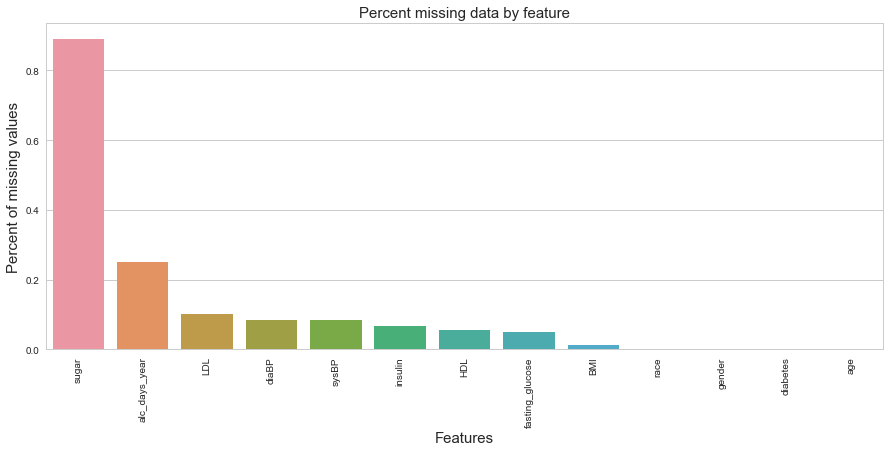

In [16]:
# purpose:   get the ratio of (missing values)/(total entries) for ***one feature***  
# input:     df: dataframe that contains the feature you want to check for NaN ratio
#            feature: the name of the feature - string           
# output:    NaN ratio of the feature, and instructions on what to do next 

def get_NaN_ratio(df,feature):
    print()
    total_count = df.shape[0]                  # total entries
    feature_valid_count = df[feature].count()  # non-NaN entries for chosen feature
    feature_null_count = total_count - feature_valid_count
    NaN_ratio = feature_null_count/total_count
    print('The NaN ratio in',feature,'is',"%.3f" % NaN_ratio)
    if NaN_ratio == 0:
        print('No missing values detected')
    elif NaN_ratio <= 0.1:
        print('Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category')
        print('Now call function: fill_NaN(df, feature, fill_type)')
    else:
        print('Since NaN ratio is large, predict NaN using ML or check predictability first...')
        print('if check predictability, call: check_predictability_all/some_x(df,y,method)')
        print('if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)')

# features = df.columns.values.tolist()
# for feature in features:
#     get_NaN_ratio(df,feature)
#     print('----------------------')


def plot_NaN_percentage_for_all(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    # missing_data.head()
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    
plot_NaN_percentage_for_all(df)
df.info()

### Outliers

In [17]:
# Function to Detection Outliers

def find_anomalies(data):
    anomalies = []
    patient = []

    # Set upper and lower limit to 3 standard deviation 
    random_data_std = data.std()
    random_data_mean = data.mean()
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for i in data:
        if i > upper_limit or i < lower_limit:
            anomalies.append(i)
            index_value_i = (data==i).index
            patient.append(index_value_i)
    return anomalies
    #return patient

print(df.columns)
   

Index(['BMI', 'HDL', 'LDL', 'age', 'alc_days_year', 'diabetes',
       'fasting_glucose', 'gender', 'insulin', 'race', 'sugar', 'sysBP',
       'diaBP'],
      dtype='object')


68


count    5434.000000
mean       28.694921
std         6.512621
min        15.100000
25%        23.900000
50%        27.800000
75%        32.300000
max        50.500000
Name: BMI, dtype: float64

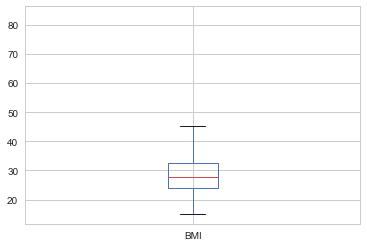

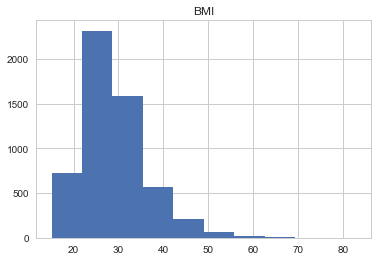

In [18]:
print(len(find_anomalies(df["BMI"])))
boxplot = df.boxplot(column=['BMI'])
hist = df.hist(column=['BMI'])
for i in find_anomalies(df["BMI"]):
    df = df[df.BMI != i]
df["BMI"].describe()

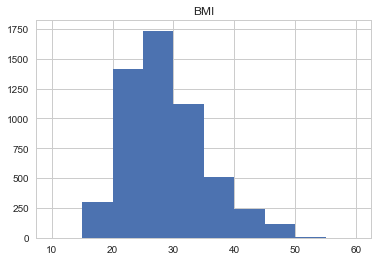

In [19]:
hist_before = df.hist(column=['BMI'], range=[10, 60])

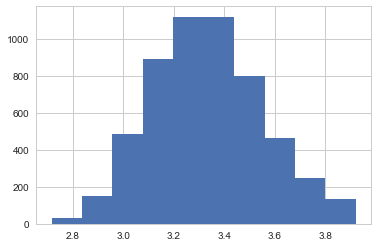

In [20]:
hist_after = np.log(df["BMI"]).hist()

53


count    5115.000000
mean        1.413851
std         0.439148
min         0.160000
25%         1.110000
50%         1.340000
75%         1.660000
max         5.840000
Name: HDL, dtype: float64

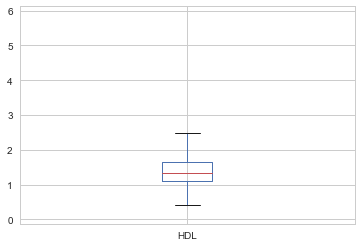

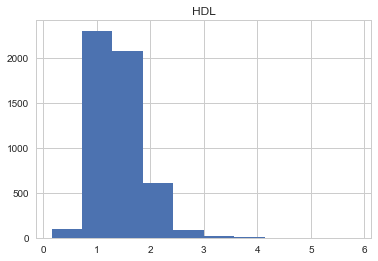

In [21]:
print(len(find_anomalies(df["HDL"])))
boxplot = df.boxplot(column=['HDL'])
hist = df.hist(column=['HDL'])
for i in find_anomalies(df["HDL"]):
    df = df[df.LDL != i]
df["HDL"].describe()

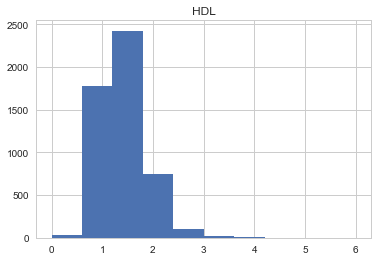

In [22]:
hist_before = df.hist(column=['HDL'], range=[0, 6])

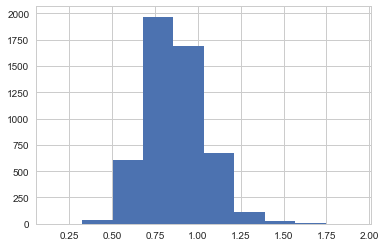

In [23]:
hist_after = np.log(df["HDL"]+1).hist()

32


count    4821.000000
mean        2.829250
std         0.879974
min         0.362000
25%         2.198000
50%         2.767000
75%         3.388000
max         5.612000
Name: LDL, dtype: float64

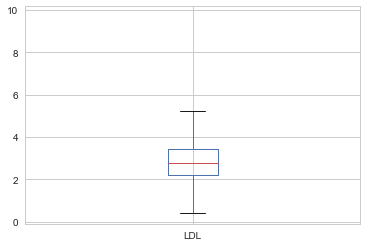

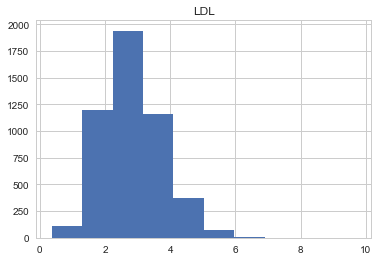

In [24]:
print(len(find_anomalies(df["LDL"])))
boxplot = df.boxplot(column=['LDL'])
hist = df.hist(column=['LDL'])
for i in find_anomalies(df["LDL"]):
    df = df[df.LDL != i]
df["LDL"].describe()

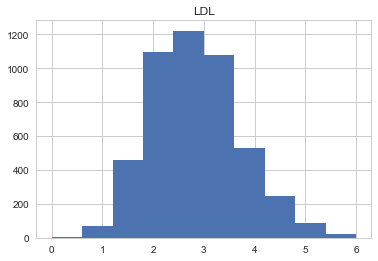

In [25]:
hist_before = df.hist(column=['LDL'], range = [0,6])

120


count    4994.000000
mean        5.829674
std         1.202900
min         1.170000
25%         5.162000
50%         5.550000
75%         6.100000
max        12.268000
Name: fasting_glucose, dtype: float64

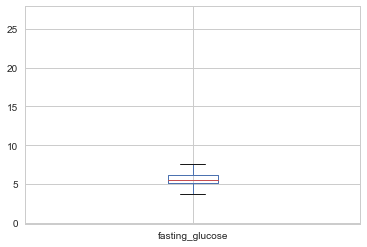

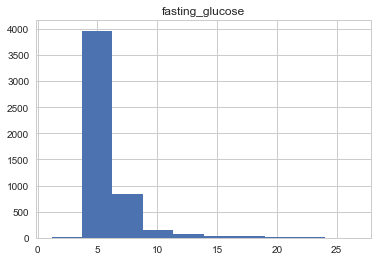

In [26]:
print(len(find_anomalies(df["fasting_glucose"])))
boxplot = df.boxplot(column=['fasting_glucose'])
hist = df.hist(column=['fasting_glucose'])
for i in find_anomalies(df["fasting_glucose"]):
    df = df[df.fasting_glucose != i]
df["fasting_glucose"].describe()

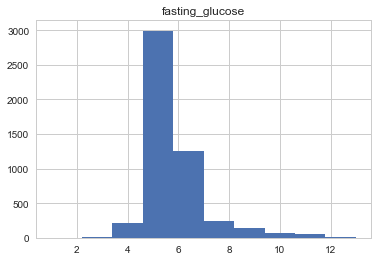

In [27]:
hist_before = df.hist(column=['fasting_glucose'], range = [1,13])

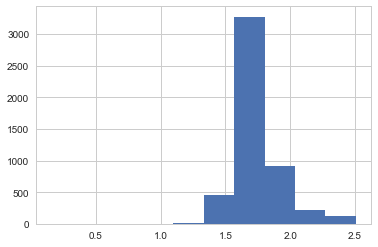

In [28]:
hist_after = np.log(df["fasting_glucose"]).hist()

56


count    4847.000000
mean       71.626420
std        57.997836
min         0.840000
25%        34.800000
50%        54.780000
75%        87.120000
max       420.540000
Name: insulin, dtype: float64

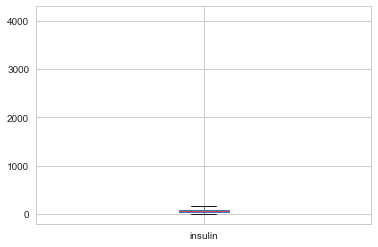

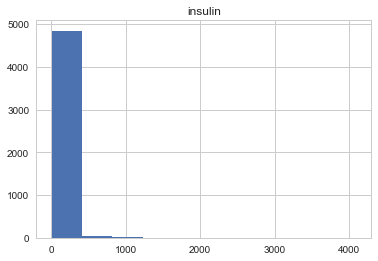

In [29]:
print(len(find_anomalies(df["insulin"])))
boxplot = df.boxplot(column=['insulin'])
hist = df.hist(column=['insulin'])
for i in find_anomalies(df["insulin"]):
    df = df[df.insulin != i]
df["insulin"].describe()

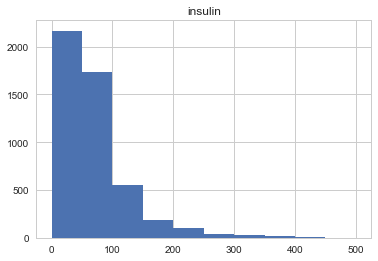

In [30]:
hist_before = df.hist(column=['insulin'], range=[0, 500])

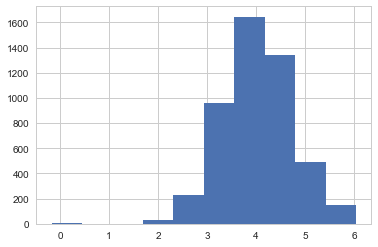

In [31]:
hist_after = np.log(df["insulin"]).hist()

15


count    549.000000
mean       1.358597
std        1.662584
min        0.010000
25%        0.110000
50%        0.670000
75%        2.000000
max        8.100000
Name: sugar, dtype: float64

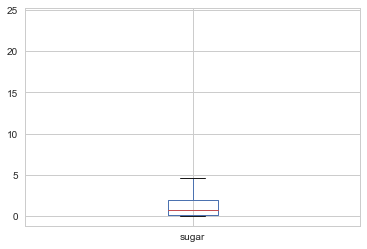

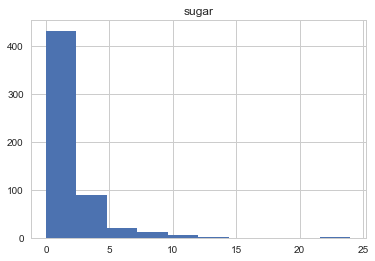

In [32]:
print(len(find_anomalies(df["sugar"])))
boxplot = df.boxplot(column=['sugar'])
hist = df.hist(column=['sugar'])
for i in find_anomalies(df["sugar"]):
    df = df[df.sugar != i]
df["sugar"].describe()

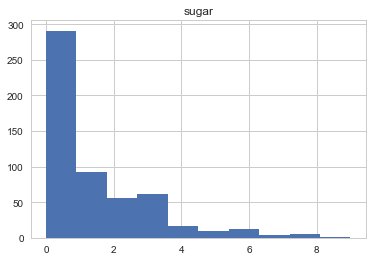

In [33]:
hist_before = df.hist(column=['sugar'], range=[0, 9])

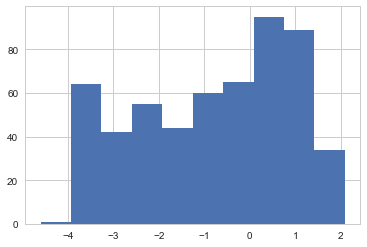

In [34]:
hist_after = np.log(df["sugar"]).hist()

61


count    4691.000000
mean      122.039650
std        16.350069
min        70.666667
25%       110.666667
50%       119.333333
75%       131.333333
max       176.000000
Name: sysBP, dtype: float64

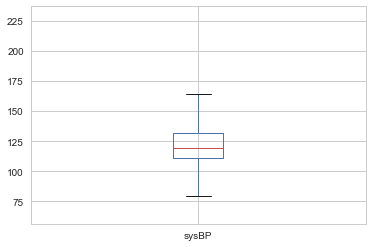

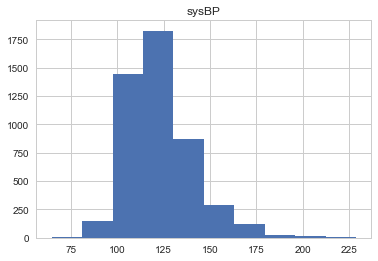

In [35]:
print(len(find_anomalies(df["sysBP"])))
boxplot = df.boxplot(column=['sysBP'])
hist = df.hist(column=['sysBP'])
for i in find_anomalies(df["sysBP"]):
    df = df[df.sysBP != i]
df["sysBP"].describe()

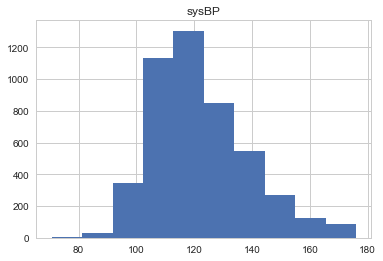

In [36]:
hist_before = df.hist(column=["sysBP"])

52


count    4639.000000
mean       68.626141
std        10.947227
min        32.000000
25%        61.333333
50%        68.666667
75%        75.333333
max       104.666667
Name: diaBP, dtype: float64

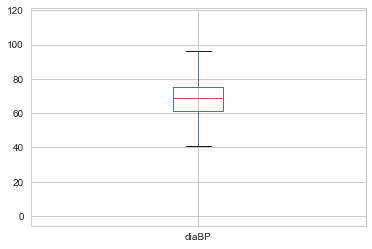

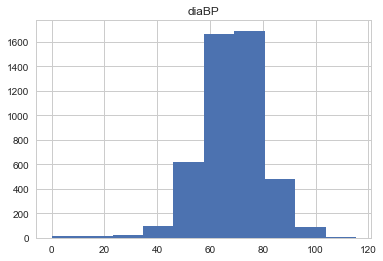

In [37]:
print(len(find_anomalies(df["diaBP"])))
boxplot = df.boxplot(column=['diaBP'])
hist = df.hist(column=['diaBP'])
for i in find_anomalies(df["diaBP"]):
    df = df[df.diaBP != i]
df["diaBP"].describe()

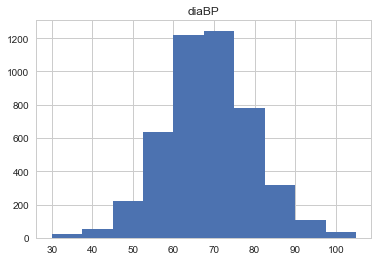

In [38]:
hist_before = df.hist(column=['diaBP'], range=[30, 105])


### Imputation of Missing values

In [39]:
# purpose:   Plot histograms showing the distribution of a feature before and after filling NaN
#            to see the change in distribution. This can tell you if the filling method is 
#            correct or not.
# input:     feature0: str0
#            feature: str
#            title of the plot

def plot_before_after(before,after,feature):
    fig, ax = plt.subplots()
    ax.hist(after,alpha=0.5,color='red')
    ax.hist(before)
    ax.legend(['after','before'])
    plt.title('Before vs. After(no NaN):'+feature)
    plt.ylabel('Frequency')

def plot_feature(feature):
    plt.figure()
    df[feature].hist()
    plt.title(feature)
    plt.ylabel('Frequency')

In [40]:
# function:  fill_NaN(df, feature, fill_type)
# purpose:   fill the missing values in ***one column/feature*** in the given df. 
# input:     df: the df containing the target column to be filled
#            feature: the column whose NaN's are dealt with
#            fill_type: choose among -> 'mean', 'mode', 'zero' 
#                       mean: if the feature is continuous without outliers - normal distribution
#                       median: if the feature is continuous with outliers - skewed distribution
#                       mode: if the feature is categorical
# output:    a df whose target column is filled (no more NaN in that col)

def fill_NaN(df, feature, fill_type):    
    before_filling = df[feature].dropna().copy(deep=True)
    if fill_type == 'mean':
        after_filling = df[feature].fillna(df[feature].dropna().mean())
    elif fill_type == 'mode':
        after_filling = df[feature].fillna(df[feature].dropna().mode().iloc[0])
    elif fill_type == 'std':
        after_filling = fill_NaN_std(df, feature)
#     elif fill_type == 'median':
#         after_filling = df[feature].fillna(df[feature].dropna().median())
    else:
        # fill type == 'zero' (new category)
        # set missing values as another category 
        # cannot set this new cat as 0 since there could be 0 after applying clean_epsilon function  
        # need to get a unique number representing NaN as a new category 
        new_type = 0
        after_filling = df[feature].fillna(new_type)   
    df[feature] = after_filling
    plot_before_after(before_filling, after_filling, feature)
    return df


def fill_NaN_std(df,feature):
    feature_avg = df[feature].mean()
    feature_std = df[feature].std()
    feature_null_count = df[feature].isnull().sum()
    feature_null_random_list = np.random.randint(feature_avg - feature_std, feature_avg + feature_std, size=feature_null_count)
    df[feature][np.isnan(df[feature])] = feature_null_random_list
    after_filling = df[feature].astype(int)
    return after_filling




In [41]:
# function:  predict_NaN_with_ML(df,x,y,data_type,model)
# purpose:   predict the values of NaN and fill these predicted values back into the dataframe
# input:     df: the dataframe containing the features used for prediction and target y(target feature)
#            x: a list of strings - features used for prediction - no NAN in all x's
#            y: a string - target feature
#            data_type: a string ->'categorical','numerical'
#            
# process: CV was used to set the hyperparamters ; and the model with a higher accuracy was chosen to impute the missing data


def predict_NaN_with_ML(df,x,y,data_type):
    before_filling = df[y].dropna().copy(deep=True)
    # build model using valid entries  
    valid_entries = df[df[y].notnull()]                # rows where y is not NaN (valid entries)
    print(valid_entries)
    valid_entries_x = valid_entries[x]                 # all x's for valid rows (x's are not NaN)
    print(valid_entries_x)
    valid_entries_y = valid_entries[y]                 # y for valid rows (y's are not NaN) 
    print(valid_entries_y)
    valid_entries_x = valid_entries_x.astype(float)    # change data type to float
    valid_entries_y = valid_entries_y.astype(float)
    
        
    if data_type == 'categorical':
        #Random Forest
        n_estimators = [int(x) for x in np.linspace(start = 5, stop = 10, num = 1)]
        max_features = ['auto', 'sqrt']
        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
        max_depth.append(None)
        min_samples_split = [10, 20]
        min_samples_leaf = [10, 20]
        bootstrap = [True, False]
        random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}
        rf = RandomForestClassifier()
        rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
        rf_random.fit(valid_entries_x, valid_entries_y)
        estimators = rf_random.best_params_['n_estimators']
        features = rf_random.best_params_['max_features']
        depth = rf_random.best_params_['max_depth']
        samples_split_min = rf_random.best_params_['min_samples_split']
        samples_leaf_min = rf_random.best_params_['min_samples_leaf']
        bstrap = rf_random.best_params_['bootstrap']
        rf_random.best_score_
        print("The best accuracy of", rf_random.best_score_, "is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )


        #kNN
        k_range = list(range(1, 50))
        param_grid = dict(n_neighbors=k_range)
        grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
        grid.fit(valid_entries_x, valid_entries_y)
        k = grid.best_params_["n_neighbors"]
        print("The best accuracy of", grid.best_score_, "is given by", k, "clusters")

            
       
        if rf_random.best_score_>grid.best_score_ :
            algo = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  bstrap)   
            print("Random Forest provides better accuracy")
            algo.fit(valid_entries_x, valid_entries_y)
               
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)
        else:
            algo = KNeighborsClassifier(n_neighbors=k)
            print("kNN provides better accuracy")
            algo.fit(valid_entries_x, valid_entries_y)
            
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)

                
    elif data_type == 'numerical':
        #Random Forest
        n_estimators = [int(x) for x in np.linspace(start = 5, stop = 10, num = 1)]
        max_features = ['auto', 'sqrt']
        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
        max_depth.append(None)
        min_samples_split = [10, 20]
        min_samples_leaf = [10, 20]
        bootstrap = [True, False]
        random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}
        rf = RandomForestRegressor()
        rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
        rf_random.fit(valid_entries_x, valid_entries_y)
        estimators = rf_random.best_params_['n_estimators']
        features = rf_random.best_params_['max_features']
        depth = rf_random.best_params_['max_depth']
        samples_split_min = rf_random.best_params_['min_samples_split']
        samples_leaf_min = rf_random.best_params_['min_samples_leaf']
        bstrap = rf_random.best_params_['bootstrap']
        rf_random.best_score_
        print("The best accuracy of", rf_random.best_score_, "is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )

        #kNN
        k_range = list(range(1, 50))
        param_grid = dict(n_neighbors=k_range)
        grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
        grid.fit(valid_entries_x, valid_entries_y)
        k = grid.best_params_["n_neighbors"]
        print("The best accuracy of", grid.best_score_, "is given by", k, "clusters")
        
        
        
        if rf_random.best_score_>grid.best_score_ :
            algo = RandomForestRegressor(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  bstrap)   
            print("Random Forest provides better accuracy")
            algo.fit(valid_entries_x, valid_entries_y)
               
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)
        else:
            algo = KNeighborsRegressor(n_neighbors=k)
            print("kNN provides better accuracy")
            categorial = ['12drinksayear','5drinksaday','5drinks2hours','gender','race']
            numerical = ['BMI','LDL','age','fasting_glucose','sysBP','diaBP','sugar']
            for i in x:
                if i in numerical:
                    valid_entries_x['i'] = preprocessing.scale(valid_entries_x['i'])
   
            algo.fit(valid_entries_x, valid_entries_y)
            
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)
    

In [42]:
#Drop the entire patient entry if that entry contains more than 6 NaN features out of 16 features (keep entries with more than 10 non-NaN values)
before = len(df.index)
df.dropna(thresh = 10,inplace = True)
after = len(df.index)
print(before-after,'patient entries are dropped since they contain more than 6 NaN variables')

439 patient entries are dropped since they contain more than 6 NaN variables


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 4640 entries, 73559.0 to 93697.0
Data columns (total 13 columns):
BMI                4607 non-null float64
HDL                4639 non-null float64
LDL                4433 non-null float64
age                4640 non-null float64
alc_days_year      3586 non-null float64
diabetes           4640 non-null float64
fasting_glucose    4634 non-null float64
gender             4640 non-null float64
insulin            4585 non-null float64
race               4640 non-null float64
sugar              511 non-null float64
sysBP              4380 non-null float64
diaBP              4380 non-null float64
dtypes: float64(13)
memory usage: 507.5 KB


### Adding dummy variables to indicate missing value in a given row for each feature

In [44]:
df.index = range(len(df))
for x in ['BMI', 'fasting_glucose', 'gender', 'LDL','HDL','insulin','age', 'race', 'sugar', 'sysBP', 'diaBP','alc_days_year']:
    dummy=pd.get_dummies(df[x],dummy_na=True)
    dummy.columns=dummy.columns.astype(str)
    y=x+"_"+"NaN"
    dummy.rename(columns={'nan':y},inplace= True)
    s=pd.DataFrame(dummy[y])
    df=pd.concat([df,s],axis=1)
print(df)

       BMI   HDL    LDL   age  alc_days_year  diabetes  fasting_glucose  \
0     28.9  1.55  1.448  72.0            0.0       1.0           10.713   
1     19.7  2.20  2.612  73.0            0.0       2.0            5.940   
2     35.7  1.50  2.508  61.0            2.0       2.0            6.106   
3     20.3  2.48  1.733  26.0            2.0       2.0            4.940   
4     22.8  1.37  1.940  33.0            NaN       2.0            4.663   
...    ...   ...    ...   ...            ...       ...              ...   
4635  22.2  1.63  2.793  34.0            2.0       2.0            4.770   
4636  20.9  1.68    NaN  41.0            NaN       2.0            6.830   
4637  28.1  2.09  1.888  69.0            0.0       1.0            6.000   
4638  21.5  1.76  1.448  76.0            NaN       2.0            5.830   
4639  31.0  2.90  3.284  80.0            2.0       2.0            5.500   

      gender  insulin  race  ...  gender_NaN  LDL_NaN  HDL_NaN  insulin_NaN  \
0        1.0    34.9

### BMI was first chosen as it had the lowest % of missing values 

#### Numerical variable with no cstr
below 18.5 – underweight
between 18.5 and 24.9 – healthy weight range
between 25 and 29.9 - overweight (diabetes risk factor)


The NaN ratio in BMI is 0.007
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


count    4640.000000
mean       28.596440
std         6.430172
min        15.100000
25%        23.900000
50%        27.700000
75%        32.100000
max        50.500000
Name: BMI, dtype: float64

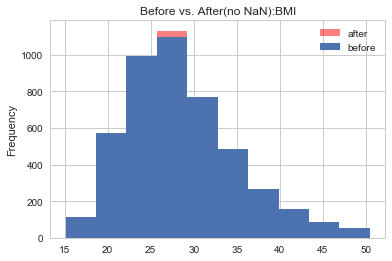

In [45]:
get_NaN_ratio(df,'BMI')
fill_NaN(df,'BMI','mean')
df['BMI'].describe()

### Fasting glucose has the second highest % of missing data

#### 
The fasting plasma glucose test (FPG) is the preferred method of screening for diabetes. The FPG measures a person's blood sugar level after fasting or not eating anything for at least 8 hours.

The global mean fasting plasma blood glucose level in humans is about 5.5 mmol/L (100 mg/dL); however, this level fluctuates throughout the day.
FPG test results:
normal: less than 5.6 mmol/L
prediabetes: 5.6 ~ 6.9 mmol/L
diabetes: 7 mmol/L or higher (on two separate tests)


The NaN ratio in fasting_glucose is 0.001
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


count    4640.000000
mean        5.797391
std         1.156427
min         1.170000
25%         5.162000
50%         5.550000
75%         6.051000
max        12.212000
Name: fasting_glucose, dtype: float64

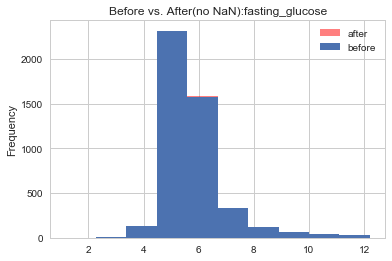

In [46]:
get_NaN_ratio(df,'fasting_glucose')
df = fill_NaN(df,'fasting_glucose','mean')
df['fasting_glucose'].describe()

### HDL


The NaN ratio in HDL is 0.000
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


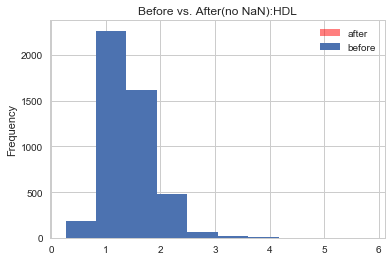

In [47]:
# Check for NaN 
get_NaN_ratio(df,'HDL')

# Since NaN ratios are small, replace NaN with mean values
df = fill_NaN(df,'HDL','mean')


### Insulin


The NaN ratio in insulin is 0.012
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


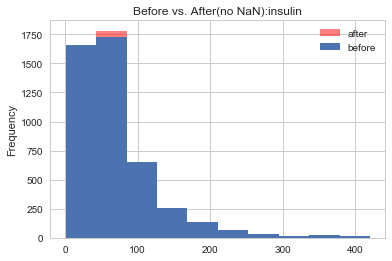

In [48]:
# Check for NaN 
get_NaN_ratio(df,'insulin')

# Since NaN ratios are small, replace NaN with mean values
df = fill_NaN(df,'insulin','mean')


### Blood Pressure

####
High blood pressure, or hypertension, is a condition that’s seen in people with type 2 diabetes. It’s unknown why there’s such a significant relationship between the two diseases. It’s believed that the following contribute to both conditions:

obesity
a diet high in fat and sodium
chronic inflammation
inactivity
The combination of high blood pressure and type 2 diabetes is particularly lethal and can significantly raise your risk of having a heart attack or stroke.


The NaN ratio in sysBP is 0.056
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)

The NaN ratio in diaBP is 0.056
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


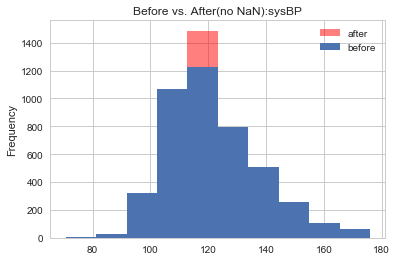

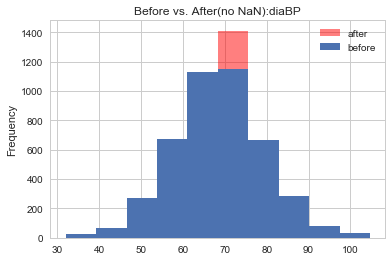

In [49]:
# Check for NaN in sysBP and diaBP
get_NaN_ratio(df,'sysBP')
get_NaN_ratio(df,'diaBP')

# Since NaN ratios are small, replace NaN with mean values
df = fill_NaN(df,'sysBP','mean')
df = fill_NaN(df,'diaBP','mean')

### LDL 

####
cholesterol (mg/dL) - values: 23 to 277
LDL stands for low-density lipoproteins. It is sometimes called the "bad" cholesterol because a high LDL level leads to a buildup of cholesterol in your arteries. This extra LDL, along with other substances, forms plaque.
Diabetes tends to lower HDL levels and raise triglyceride and LDL levels, which increases the risk for heart disease and stroke.


The NaN ratio in LDL is 0.045
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)

NaN    0
2.833058    207
2.664000     69
2.948000     65
2.845000     60
2.379000     60
           ... 
5.534000      1
5.172000      1
0.879000      1
1.060000      1
5.405000      1
Name: LDL, Length: 189, dtype: int64


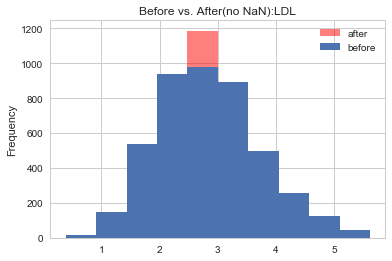

In [50]:
# Check for NaN 
get_NaN_ratio(df,'LDL')
df = fill_NaN(df,'LDL','mean')
get_value_count(df,'LDL')

### Diabetes

In [51]:
# Change 2(NHANES for No) to 0(False - boolean) for features with YES/NO answers
df.loc[df['diabetes'] == 2,['diabetes']] = 0
df['diabetes'].value_counts()
df = process_cstr(df,feature='diabetes',method='drop',cstr=[7,9])

In [52]:
get_NaN_ratio(df,'diabetes')
df['diabetes'].value_counts()


The NaN ratio in diabetes is 0.000
No missing values detected


0.0    4034
1.0     480
3.0     124
Name: diabetes, dtype: int64

In [53]:
db_counts = df['diabetes'].value_counts().to_dict()
percentage_yes_db = db_counts[1.0]/df['diabetes'].shape[0]
percentage_pre_db = db_counts[3.0]/df['diabetes'].shape[0]
percentage_no_db = db_counts[0.0]/df['diabetes'].shape[0]
print(percentage_yes_db*100,'% people have diabetes')
print(percentage_pre_db*100,'% people are pre diabetes')
print(percentage_no_db*100,'% people do not have diabetes')


10.34928848641656 % people have diabetes
2.673566192324278 % people are pre diabetes
86.97714532125916 % people do not have diabetes


In [54]:
df = df[df['diabetes'] != 3.0]
df['diabetes'].value_counts()
percentage_yes_db = db_counts[1.0]/df['diabetes'].shape[0]
percentage_no_db = db_counts[0.0]/df['diabetes'].shape[0]
print(percentage_yes_db*100,'% people have diabetes')
print(percentage_no_db*100,'% people do not have diabetes')
print('Baseline accuracy',percentage_no_db*100)


10.633584404076208 % people have diabetes
89.36641559592378 % people do not have diabetes
Baseline accuracy 89.36641559592378


In [55]:
#Final NaN check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4639
Data columns (total 25 columns):
BMI                    4514 non-null float64
HDL                    4514 non-null float64
LDL                    4514 non-null float64
age                    4514 non-null float64
alc_days_year          3484 non-null float64
diabetes               4514 non-null float64
fasting_glucose        4514 non-null float64
gender                 4514 non-null float64
insulin                4514 non-null float64
race                   4514 non-null float64
sugar                  495 non-null float64
sysBP                  4514 non-null float64
diaBP                  4514 non-null float64
BMI_NaN                4514 non-null uint8
fasting_glucose_NaN    4514 non-null uint8
gender_NaN             4514 non-null uint8
LDL_NaN                4514 non-null uint8
HDL_NaN                4514 non-null uint8
insulin_NaN            4514 non-null uint8
age_NaN                4514 non-null uint8
race_NaN

In [56]:
#Drop Sugar and alc_days_year since they have a high % of missing values 
df.drop(['sugar', 'alc_days_year'], axis=1, inplace = True)


### One Hot Encoding

In [57]:
#Race
df['race'] = pd.Categorical(df['race'])
dfDummies = pd.get_dummies(df['race'], prefix = 'race')
df = pd.concat([df, dfDummies], axis=1)

#Gender
df['gender'] = pd.Categorical(df['gender'])
dfDummies = pd.get_dummies(df['gender'], prefix = 'gender')
df = pd.concat([df, dfDummies], axis=1)

df.drop(['race', 'gender', 'race_7.0', 'gender_2.0'], axis=1, inplace = True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4639
Data columns (total 27 columns):
BMI                    4514 non-null float64
HDL                    4514 non-null float64
LDL                    4514 non-null float64
age                    4514 non-null float64
diabetes               4514 non-null float64
fasting_glucose        4514 non-null float64
insulin                4514 non-null float64
sysBP                  4514 non-null float64
diaBP                  4514 non-null float64
BMI_NaN                4514 non-null uint8
fasting_glucose_NaN    4514 non-null uint8
gender_NaN             4514 non-null uint8
LDL_NaN                4514 non-null uint8
HDL_NaN                4514 non-null uint8
insulin_NaN            4514 non-null uint8
age_NaN                4514 non-null uint8
race_NaN               4514 non-null uint8
sugar_NaN              4514 non-null uint8
sysBP_NaN              4514 non-null uint8
diaBP_NaN              4514 non-null uint8
alc_days_year_N

### Test-Train Split

In [58]:
X = df.loc[:, df.columns != 'diabetes']
y = df.loc[:, df.columns == 'diabetes']
os = SMOTE(random_state=0)
X_train_before, X_test, y_train_before, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_before, X_val, y_train_before, y_val = train_test_split(X_train_before, y_train_before, test_size=0.3, random_state=0)
X_train_before = pd.DataFrame(X_train_before)
columns = X.columns
os_data_X,os_data_y=os.fit_sample(X_train_before, y_train_before)
os_data_X_train = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y_train = pd.DataFrame(data=os_data_y,columns=['diabetes'])

X_train_after = os_data_X_train
y_train_after = os_data_y_train

# we can Check the numbers of our data
print("length of data before oversampling ",len(X_train_before))
print("length of data after oversampling ",len(X_train_after))
print("Number of no subscription in oversampled data",len(y_train_after[y_train_after['diabetes']==0]))
print("Number of yes subscription in oversampled data",len(y_train_after[y_train_after['diabetes']==1]))
print("Proportion of data with no diabetes in oversampled data is ",len(y_train_after[y_train_after['diabetes']==0])/len(X_train_after))
print("Proportion of data with diabetes in oversampled data is ",len(y_train_after[y_train_after['diabetes']==1])/len(X_train_after))


print(len(X_train_after),len(X_val),len(X_test))



length of data before oversampling  2211
length of data after oversampling  3970
Number of no subscription in oversampled data 1985
Number of yes subscription in oversampled data 1985
Proportion of data with no diabetes in oversampled data is  0.5
Proportion of data with diabetes in oversampled data is  0.5
3970 948 1355


#### Test Train Split for scaled Numerical features

In [59]:
df_new = df.copy()
df_new["BMI"] = (df["BMI"] - df["BMI"].mean())/df["BMI"].std()
df_new["HDL"] = (df["HDL"] - df["HDL"].mean())/df["HDL"].std()
df_new["LDL"] = (df["LDL"] - df["LDL"].mean())/df["LDL"].std()
df_new["age"] = (df["age"] - df["age"].mean())/df["age"].std()
df_new["fasting_glucose"] = (df["fasting_glucose"] - df["fasting_glucose"].mean())/df["fasting_glucose"].std()
X_scaled = df_new.loc[:, df_new.columns != 'diabetes']
y = df_new.loc[:, df_new.columns == 'diabetes']

os = SMOTE(random_state=0)
X_scaled_train_before, X_scaled_test, y_train_before, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
X_scaled_train_before, X_scaled_val, y_train_before, y_val = train_test_split(X_scaled_train_before, y_train_before, test_size=0.3, random_state=0)
X_scaled_train_before = pd.DataFrame(X_scaled_train_before)
columns = X_scaled.columns

os_data_X,os_data_y=os.fit_sample(X_scaled_train_before, y_train_before)
os_data_X_train_scaled = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y_train = pd.DataFrame(data=os_data_y,columns=['diabetes'])
X_scaled_train_after = os_data_X_train_scaled
y_train_after = os_data_y_train

print("length of data before oversampling ",len(X_scaled_train_before))
print("length of data after oversampling ",len(X_scaled_train_after))
print("Number of no subscription in oversampled data",len(y_train_after[y_train_after['diabetes']==0]))
print("Number of yes subscription in oversampled data",len(y_train_after[y_train_after['diabetes']==1]))
print("Proportion of data with no diabetes in oversampled data is ",len(y_train_after[y_train_after['diabetes']==0])/len(X_scaled_train_after))
print("Proportion of data with diabetes in oversampled data is ",len(y_train_after[y_train_after['diabetes']==1])/len(X_scaled_train_after))


print(len(X_scaled_train_after),len(X_scaled_val),len(X_scaled_test))


length of data before oversampling  2211
length of data after oversampling  3970
Number of no subscription in oversampled data 1985
Number of yes subscription in oversampled data 1985
Proportion of data with no diabetes in oversampled data is  0.5
Proportion of data with diabetes in oversampled data is  0.5
3970 948 1355


# Feature selection



In [60]:
df_new.head()

,BMI,HDL,LDL,age,diabetes,fasting_glucose,insulin,sysBP,diaBP,BMI_NaN,...,sugar_NaN,sysBP_NaN,diaBP_NaN,alc_days_year_NaN,race_1.0,race_2.0,race_3.0,race_4.0,race_6.0,gender_1.0
0,0.058251,0.292155,-1.616851,1.340173,1.0,4.251301,34.98,142.000000,82.000000,0,...,1,0,0,0,0,0,1,0,0,1
1,-1.377134,1.778078,-0.257178,1.394822,0.0,0.134614,36.72,137.333333,86.666667,0,...,1,0,0,0,0,0,1,0,0,0
2,1.119187,0.177854,-0.378661,0.739033,0.0,0.277788,89.46,122.666667,80.666667,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.283522,2.418167,-1.283942,-1.173683,0.0,-0.727881,23.10,104.666667,62.666667,0,...,1,0,0,0,0,0,1,0,0,0
4,-0.893472,-0.119331,-1.042144,-0.791140,0.0,-0.966792,36.30,121.333333,62.000000,0,...,1,0,0,1,0,0,0,0,1,0


In [61]:
df_new.columns

Index(['BMI', 'HDL', 'LDL', 'age', 'diabetes', 'fasting_glucose', 'insulin',
       'sysBP', 'diaBP', 'BMI_NaN', 'fasting_glucose_NaN', 'gender_NaN',
       'LDL_NaN', 'HDL_NaN', 'insulin_NaN', 'age_NaN', 'race_NaN', 'sugar_NaN',
       'sysBP_NaN', 'diaBP_NaN', 'alc_days_year_NaN', 'race_1.0', 'race_2.0',
       'race_3.0', 'race_4.0', 'race_6.0', 'gender_1.0'],
      dtype='object')

# pearson method for knn


In [62]:
columnscorr1=['BMI', 'HDL','LDL','age','fasting_glucose','insulin','sysBP','diaBP',"diabetes"]
df_new[columnscorr1].corr()['diabetes']

BMI                0.143587
HDL               -0.105869
LDL               -0.126151
age                0.280643
fasting_glucose    0.549015
insulin            0.140502
sysBP              0.165743
diaBP              0.014991
diabetes           1.000000
Name: diabetes, dtype: float64

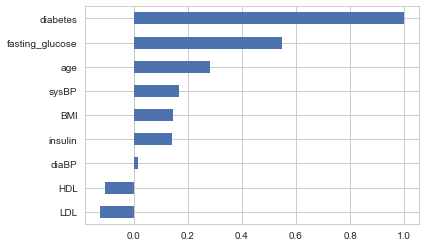

In [63]:
df_new[columnscorr1].corr()['diabetes'].sort_values(ascending=True).plot(kind='barh')
plt.show()

In [64]:
highly_correlated_features =df_new.columns[df.corr()['diabetes'].abs() > .1]
highly_correlated_features = highly_correlated_features.drop('diabetes')
highly_correlated_features
# change nothing for knn

Index(['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'insulin', 'sysBP'], dtype='object')

# Logistic regression with Pearson correlation

The Training set accuracy of the Logistic Regression model is 0.8649874055415617
The Validation set accuracy of the Logistic Regression model is 0.8481012658227848
Test set accuracy of the Logistic Regression model is 0.8413284132841329
The precision is 0.3859060402684564 recall is 0.782312925170068 fscore is 0.5168539325842697


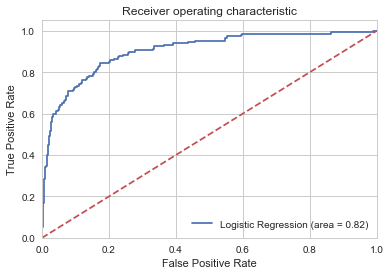

In [65]:
#Logistic regression with Pearson correlation
# the numerical variable after pearson corr+ categorical variable
logreg = LogisticRegression()
chosen_vars = ['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'BMI_NaN', 'fasting_glucose_NaN', 'LDL_NaN', 'insulin_NaN', 'sugar_NaN', 'sysBP_NaN', 'diaBP_NaN', 'alc_days_year_NaN', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0', 'gender_1.0']

X_lr_train = X_train_after[chosen_vars]  
X_lr_test = X_test[chosen_vars]
X_lr_val = X_val[chosen_vars]

#Fitting the model on the training set and assessing the performance
logreg_model = logreg.fit(X_lr_train, y_train_after)
logreg_train = logreg.predict(X_lr_train)
logreg_accuracy_train = accuracy_score(y_train_after, logreg_train)
print("The Training set accuracy of the Logistic Regression model is", logreg_accuracy_train)

#Model performance on the Validation set
logreg_accuracy_val = logreg.predict(X_lr_val)
logreg_accuracy_val = accuracy_score(y_val, logreg_accuracy_val)
print("The Validation set accuracy of the Logistic Regression model is", logreg_accuracy_val)

#Model performance on the Test set
log_pred_test = logreg.predict(X_lr_test)
log_accuracy_test = accuracy_score(y_test, log_pred_test)
print('Test set accuracy of the Logistic Regression model is',log_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#logreg_confusion = pd.crosstab(y_test, log_pred_test)
#print(logreg_confusion)

lr_other_metrics = precision_recall_fscore_support(y_test, log_pred_test, average='binary')
print("The precision is", lr_other_metrics[0], "recall is", lr_other_metrics[1], "fscore is", lr_other_metrics[2])         


#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_lr_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_lr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# p value

In [66]:
# SelectKBest selects features according to the k highest scores of a given scoring function
from sklearn.feature_selection import SelectKBest
# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif
# f_classif allows for negative values, not all do
# chi2 is a very common classification criteria but only allows for positive values
# regression has its own statistical tests

In [67]:
# keep only the best ten features according to p-values of ANOVA test
k_best = SelectKBest(f_classif, k=10)
k_best1 = SelectKBest(f_classif, k=10)

In [68]:
# matrix after selecting the top 5 features
k_best.fit_transform(X_scaled_train_after, y_train_after)
k_best1.fit_transform(X_train_after, y_train_after)

array([[2.36000000e+01, 1.47000000e+00, 3.82700000e+00, ...,
        7.86666667e+01, 0.00000000e+00, 0.00000000e+00],
       [3.08000000e+01, 9.80000000e-01, 2.81900000e+00, ...,
        5.93333333e+01, 0.00000000e+00, 0.00000000e+00],
       [2.29000000e+01, 1.24000000e+00, 2.32700000e+00, ...,
        6.33333333e+01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.90147427e+01, 9.68682760e-01, 2.86835124e+00, ...,
        7.06154812e+01, 5.60725026e-01, 1.00000000e+00],
       [3.04437580e+01, 1.51464789e+00, 2.18435259e+00, ...,
        3.90951771e+01, 9.59827149e-01, 4.01728506e-02],
       [4.36473643e+01, 1.30252841e+00, 3.01813163e+00, ...,
        6.80842803e+01, 4.58491162e-01, 4.58491162e-01]])

In [69]:
X_scaled_train_after.head()

,BMI,HDL,LDL,age,fasting_glucose,insulin,sysBP,diaBP,BMI_NaN,fasting_glucose_NaN,...,sugar_NaN,sysBP_NaN,diaBP_NaN,alc_days_year_NaN,race_1.0,race_2.0,race_3.0,race_4.0,race_6.0,gender_1.0
0,-0.768656,0.109273,1.162069,0.247192,0.082864,86.94,116.666667,78.666667,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.354689,-1.010884,-0.015380,-1.119034,-0.679581,46.68,104.000000,59.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.877870,-0.416515,-0.590088,-1.610876,-0.679581,47.58,120.666667,63.333333,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.682331,0.543619,0.860698,0.848331,-0.344933,84.60,125.333333,62.666667,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.721850,-0.005029,-1.254739,-0.900438,-0.440670,40.38,113.333333,73.333333,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [71]:
# get the p values of columns
k_best1.pvalues_
# make a dataframe of features and p-values
# sort that dataframe by p-value
p_values1 = pd.DataFrame({'column': X_train_after.columns, 'p_value':
k_best.pvalues_}).sort_values('p_value')
# show the top 10 features
p_values1.head(10)

,column,p_value
4,fasting_glucose,0.000000e+00
3,age,1.480456e-251
6,sysBP,7.478209e-79
0,BMI,1.383000e-67
1,HDL,1.641485e-46
5,insulin,6.291005e-46
2,LDL,4.692714e-38
18,diaBP_NaN,2.583689e-05
17,sysBP_NaN,2.583689e-05
25,gender_1.0,1.793634e-04


In [72]:
featurepvaluelog=['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'insulin',
       'sysBP', 'sysBP_NaN', 'diaBP_NaN', 'gender_1.0']

# Logistic regression with p-value

The Training set accuracy of the Logistic Regression model is 0.8511335012594459
The Validation set accuracy of the Logistic Regression model is 0.8481012658227848
Test set accuracy of the Logistic Regression model is 0.8435424354243543
The precision is 0.3920265780730897 recall is 0.8027210884353742 fscore is 0.5267857142857143


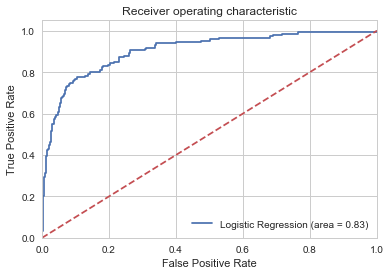

In [117]:
#Logistic regression with p-value

chosen_vars = featurepvaluelog
X_lr_train = X_train_after[chosen_vars]  
X_lr_test = X_test[chosen_vars]
X_lr_val = X_val[chosen_vars]

#Fitting the model on the training set and assessing the performance
logreg_model = logreg.fit(X_lr_train, y_train_after)
logreg_train = logreg.predict(X_lr_train)
logreg_accuracy_train = accuracy_score(y_train_after, logreg_train)
print("The Training set accuracy of the Logistic Regression model is", logreg_accuracy_train)

#Model performance on the Validation set
logreg_accuracy_val = logreg.predict(X_lr_val)
logreg_accuracy_val = accuracy_score(y_val, logreg_accuracy_val)
print("The Validation set accuracy of the Logistic Regression model is", logreg_accuracy_val)

#Model performance on the Test set
log_pred_test = logreg.predict(X_lr_test)
log_accuracy_test = accuracy_score(y_test, log_pred_test)
print('Test set accuracy of the Logistic Regression model is',log_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#logreg_confusion = pd.crosstab(y_test, log_pred_test)
#print(logreg_confusion)

lr_other_metrics = precision_recall_fscore_support(y_test, log_pred_test, average='binary')
print("The precision is", lr_other_metrics[0], "recall is", lr_other_metrics[1], "fscore is", lr_other_metrics[2])         


#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_lr_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_lr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# knn with p-value

In [103]:
# get the p values of columns
k_best.pvalues_
# make a dataframe of features and p-values
# sort that dataframe by p-value
p_values = pd.DataFrame({'column': X_scaled_train_after.columns, 'p_value':
k_best.pvalues_}).sort_values('p_value')
# show the top 10 features
p_values.head(10)
featurepvalueknn=['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'insulin',
       'sysBP', 'sysBP_NaN', 'diaBP_NaN', 'gender_1.0']

In [123]:
def hp_rangeknn(a):
    accuracy = []
    k_range = list(range(1, 50))
    for i in k_range:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn_new = knn.fit(X_scaled_train_after[a], y_train_after)
        knn_new_val = knn.predict(X_scaled_val[a])
        knn_accuracy_val = accuracy_score(y_val, knn_new_val)
        accuracy.append(knn_accuracy_val)
    plt.plot(k_range,accuracy)

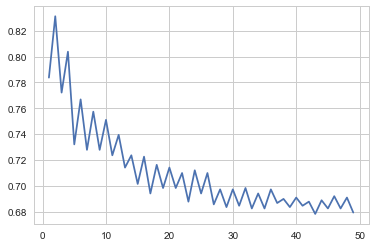

In [108]:
hp_rangeknn()

In [118]:
#kNN model fitting on the training set
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_scaled_train_after[featurepvalueknn], y_train_after)
knn_pred_train = knn.predict(X_scaled_train_after[featurepvalueknn])
knn_accuracy_train = accuracy_score(y_train_after, knn_pred_train)
print("The Training set accuracy of the kNN model is", knn_accuracy_train)

#Model performance on the Validation set
knn_pred_val = knn.predict(X_scaled_val[featurepvalueknn])
knn_accuracy_val = accuracy_score(y_val, knn_pred_val)
print("The Validation set accuracy of the kNN model is", knn_accuracy_val)

#Model performance on the Test set
knn_pred_test = knn.predict(X_scaled_test[featurepvalueknn])
knn_accuracy_test = accuracy_score(y_test, knn_pred_test)
print('Test set accuracy of the kNN model is',knn_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#knn_confusion = pd.crosstab(y_test, knn_pred_test)
#print(knn_confusion)
precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
knn_other_metrics = precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
print("The precision is", knn_other_metrics[0], "recall is", knn_other_metrics[1], "fscore is", knn_other_metrics[2])         

The Training set accuracy of the kNN model is 0.982367758186398
The Validation set accuracy of the kNN model is 0.8312236286919831
Test set accuracy of the kNN model is 0.8317343173431734
The precision is 0.2923076923076923 recall is 0.3877551020408163 fscore is 0.3333333333333333


# chi2 test

In [120]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_after,y_train_after)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_after.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(10,'Score'))
featurechi2=['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'insulin',
       'sysBP', 'diaBP', 'gender_1.0', 'race_4.0']

           Features         Score
5           insulin  11818.770528
3               age   5462.845106
6             sysBP    787.729884
4   fasting_glucose    668.398539
0               BMI    345.264623
2               LDL     40.042339
1               HDL     26.129710
7             diaBP     26.122395
25       gender_1.0     12.161293
23         race_4.0     11.337105


# Logistic regression with chi-2 test

In [3]:
#Logistic regression with chi-2 test

chosen_vars = featurechi2
X_lr_train = X_train_after[chosen_vars]  
X_lr_test = X_test[chosen_vars]
X_lr_val = X_val[chosen_vars]

#Fitting the model on the training set and assessing the performance
logreg_model = logreg.fit(X_lr_train, y_train_after)
logreg_train = logreg.predict(X_lr_train)
logreg_accuracy_train = accuracy_score(y_train_after, logreg_train)
print("The Training set accuracy of the Logistic Regression model is", logreg_accuracy_train)

#Model performance on the Validation set
logreg_accuracy_val = logreg.predict(X_lr_val)
logreg_accuracy_val = accuracy_score(y_val, logreg_accuracy_val)
print("The Validation set accuracy of the Logistic Regression model is", logreg_accuracy_val)

#Model performance on the Test set
log_pred_test = logreg.predict(X_lr_test)
log_accuracy_test = accuracy_score(y_test, log_pred_test)
print('Test set accuracy of the Logistic Regression model is',log_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#logreg_confusion = pd.crosstab(y_test, log_pred_test)
#print(logreg_confusion)

lr_other_metrics = precision_recall_fscore_support(y_test, log_pred_test, average='binary')
print("The precision is", lr_other_metrics[0], "recall is", lr_other_metrics[1], "fscore is", lr_other_metrics[2])         


#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_lr_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_lr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'featurechi2' is not defined

# Backward Elimination with Knn

In [122]:
#Backward Elimination with Knn
import statsmodels.api as sm
cols = list(X_scaled_train_after.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_scaled_train_after[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train_after,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE_knn = cols
print(selected_features_BE_knn)

['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'diaBP', 'LDL_NaN', 'sugar_NaN', 'alc_days_year_NaN', 'race_3.0', 'race_4.0']


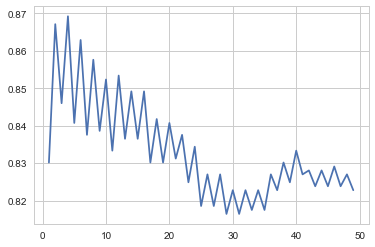

In [124]:
hp_rangeknn(selected_features_BE_knn)

In [125]:
#kNN model fitting on the training set
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_scaled_train_after[selected_features_BE_knn], y_train_after)
knn_pred_train = knn.predict(X_scaled_train_after[selected_features_BE_knn])
knn_accuracy_train = accuracy_score(y_train_after, knn_pred_train)
print("The Training set accuracy of the kNN model is", knn_accuracy_train)

#Model performance on the Validation set
knn_pred_val = knn.predict(X_scaled_val[selected_features_BE_knn])
knn_accuracy_val = accuracy_score(y_val, knn_pred_val)
print("The Validation set accuracy of the kNN model is", knn_accuracy_val)

#Model performance on the Test set
knn_pred_test = knn.predict(X_scaled_test[selected_features_BE_knn])
knn_accuracy_test = accuracy_score(y_test, knn_pred_test)
print('Test set accuracy of the kNN model is',knn_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#knn_confusion = pd.crosstab(y_test, knn_pred_test)
#print(knn_confusion)
precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
knn_other_metrics = precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
print("The precision is", knn_other_metrics[0], "recall is", knn_other_metrics[1], "fscore is", knn_other_metrics[2])         

The Training set accuracy of the kNN model is 0.9833753148614609
The Validation set accuracy of the kNN model is 0.8670886075949367
Test set accuracy of the kNN model is 0.8560885608856088
The precision is 0.3918918918918919 recall is 0.5918367346938775 fscore is 0.4715447154471545


# Backward Elimination with logistic regression

In [127]:
#Backward Elimination with log
import statsmodels.api as sm
cols = list(X_train_after.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train_after[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train_after,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE_log = cols
print(selected_features_BE_log)

['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'diaBP', 'fasting_glucose_NaN', 'LDL_NaN', 'sugar_NaN', 'alc_days_year_NaN', 'race_1.0', 'race_3.0', 'race_4.0', 'race_6.0']


The Training set accuracy of the Logistic Regression model is 0.8652392947103275
The Validation set accuracy of the Logistic Regression model is 0.8459915611814346
Test set accuracy of the Logistic Regression model is 0.8413284132841329
The precision is 0.3881578947368421 recall is 0.8027210884353742 fscore is 0.5232815964523282


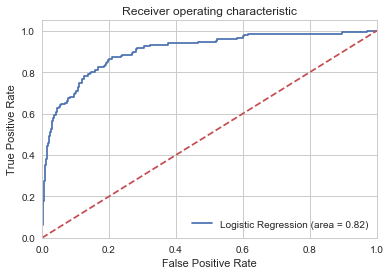

In [128]:
#Logistic regression with BE

chosen_vars = selected_features_BE_log
X_lr_train = X_train_after[chosen_vars]  
X_lr_test = X_test[chosen_vars]
X_lr_val = X_val[chosen_vars]

#Fitting the model on the training set and assessing the performance
logreg_model = logreg.fit(X_lr_train, y_train_after)
logreg_train = logreg.predict(X_lr_train)
logreg_accuracy_train = accuracy_score(y_train_after, logreg_train)
print("The Training set accuracy of the Logistic Regression model is", logreg_accuracy_train)

#Model performance on the Validation set
logreg_accuracy_val = logreg.predict(X_lr_val)
logreg_accuracy_val = accuracy_score(y_val, logreg_accuracy_val)
print("The Validation set accuracy of the Logistic Regression model is", logreg_accuracy_val)

#Model performance on the Test set
log_pred_test = logreg.predict(X_lr_test)
log_accuracy_test = accuracy_score(y_test, log_pred_test)
print('Test set accuracy of the Logistic Regression model is',log_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#logreg_confusion = pd.crosstab(y_test, log_pred_test)
#print(logreg_confusion)

lr_other_metrics = precision_recall_fscore_support(y_test, log_pred_test, average='binary')
print("The precision is", lr_other_metrics[0], "recall is", lr_other_metrics[1], "fscore is", lr_other_metrics[2])         


#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_lr_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_lr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision tree

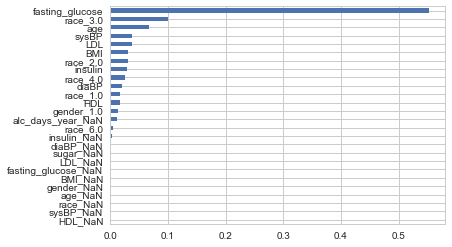

In [129]:
dt=DecisionTreeClassifier()
dt.fit(X_scaled_train_after,y_train_after)
feat_importances1 = pd.Series(dt.feature_importances_, index=X_scaled_train_after.columns)
feat_importances1.sort_values(ascending=True).plot(kind='barh')
plt.show()

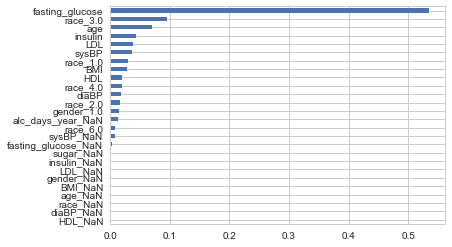

In [133]:
dt=DecisionTreeClassifier()
dt.fit(X_train_after,y_train_after)
feat_importances1 = pd.Series(dt.feature_importances_, index=X_train_after.columns)
feat_importances1.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [135]:
treelog=["fasting_glucose","age","diaBP","LDL","BMI","insulin","race_2.0","race_1.0","race_4.0","sysBP","HDL","gender_1.0","race_3.0","HDL"]

In [131]:
treeknn=["fasting_glucose","age","diaBP","LDL","BMI","insulin","race_2.0","race_1.0","race_4.0","sysBP","HDL","gender_1.0"]

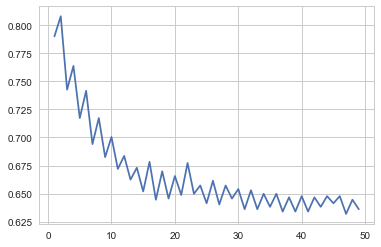

In [132]:
hp_rangeknn(treeknn)
# not better than before. So no further research on this.

The Training set accuracy of the Logistic Regression model is 0.8642317380352644
The Validation set accuracy of the Logistic Regression model is 0.8470464135021097
Test set accuracy of the Logistic Regression model is 0.8487084870848709
The precision is 0.4013605442176871 recall is 0.8027210884353742 fscore is 0.5351473922902494


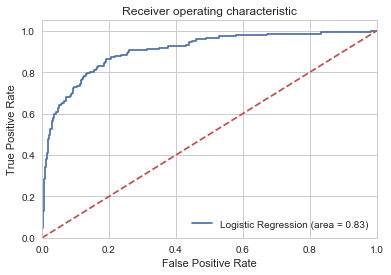

In [137]:
#Logistic regression with decision tree

chosen_vars = treelog
X_lr_train = X_train_after[chosen_vars]  
X_lr_test = X_test[chosen_vars]
X_lr_val = X_val[chosen_vars]

#Fitting the model on the training set and assessing the performance
logreg_model = logreg.fit(X_lr_train, y_train_after)
logreg_train = logreg.predict(X_lr_train)
logreg_accuracy_train = accuracy_score(y_train_after, logreg_train)
print("The Training set accuracy of the Logistic Regression model is", logreg_accuracy_train)

#Model performance on the Validation set
logreg_accuracy_val = logreg.predict(X_lr_val)
logreg_accuracy_val = accuracy_score(y_val, logreg_accuracy_val)
print("The Validation set accuracy of the Logistic Regression model is", logreg_accuracy_val)

#Model performance on the Test set
log_pred_test = logreg.predict(X_lr_test)
log_accuracy_test = accuracy_score(y_test, log_pred_test)
print('Test set accuracy of the Logistic Regression model is',log_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#logreg_confusion = pd.crosstab(y_test, log_pred_test)
#print(logreg_confusion)

lr_other_metrics = precision_recall_fscore_support(y_test, log_pred_test, average='binary')
print("The precision is", lr_other_metrics[0], "recall is", lr_other_metrics[1], "fscore is", lr_other_metrics[2])         


#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_lr_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_lr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

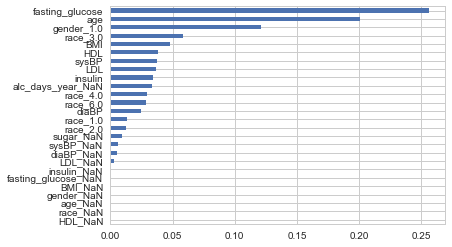

In [138]:
RF=RandomForestClassifier()
RF.fit(X_scaled_train_after,y_train_after)
feat_importances2 = pd.Series(RF.feature_importances_, index=X_scaled_train_after.columns)
feat_importances2.sort_values(ascending=True).plot(kind='barh')
plt.show()

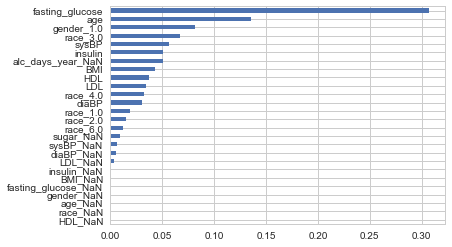

In [145]:
RF=RandomForestClassifier()
RF.fit(X_train_after,y_train_after)
feat_importances2 = pd.Series(RF.feature_importances_, index=X_train_after.columns)
feat_importances2.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [143]:
rfknn=["fasting_glucose","age","diaBP","LDL","BMI","insulin","race_6.0","race_4.0","sysBP","HDL","gender_1.0","race_3.0","HDL","alc_days_year_NaN"]

In [147]:
rflog=["fasting_glucose","age","diaBP","LDL","BMI","insulin","race_4.0","sysBP","HDL","gender_1.0","race_3.0","HDL","alc_days_year_NaN"]

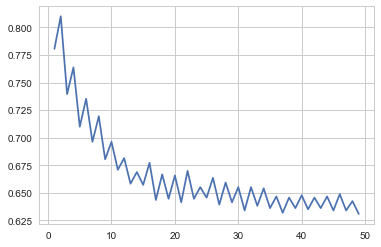

In [144]:
hp_rangeknn(rfknn)
# not good. So no further research.

The Training set accuracy of the Logistic Regression model is 0.8622166246851385
The Validation set accuracy of the Logistic Regression model is 0.8502109704641351
Test set accuracy of the Logistic Regression model is 0.8487084870848709
The precision is 0.4006849315068493 recall is 0.7959183673469388 fscore is 0.5330296127562643


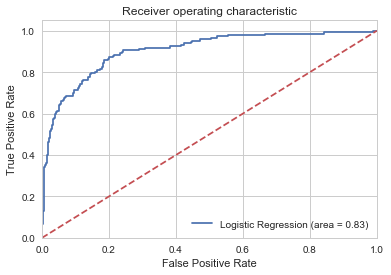

In [148]:
#Logistic regression with random forest

chosen_vars = rflog
X_lr_train = X_train_after[chosen_vars]  
X_lr_test = X_test[chosen_vars]
X_lr_val = X_val[chosen_vars]

#Fitting the model on the training set and assessing the performance
logreg_model = logreg.fit(X_lr_train, y_train_after)
logreg_train = logreg.predict(X_lr_train)
logreg_accuracy_train = accuracy_score(y_train_after, logreg_train)
print("The Training set accuracy of the Logistic Regression model is", logreg_accuracy_train)

#Model performance on the Validation set
logreg_accuracy_val = logreg.predict(X_lr_val)
logreg_accuracy_val = accuracy_score(y_val, logreg_accuracy_val)
print("The Validation set accuracy of the Logistic Regression model is", logreg_accuracy_val)

#Model performance on the Test set
log_pred_test = logreg.predict(X_lr_test)
log_accuracy_test = accuracy_score(y_test, log_pred_test)
print('Test set accuracy of the Logistic Regression model is',log_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#logreg_confusion = pd.crosstab(y_test, log_pred_test)
#print(logreg_confusion)

lr_other_metrics = precision_recall_fscore_support(y_test, log_pred_test, average='binary')
print("The precision is", lr_other_metrics[0], "recall is", lr_other_metrics[1], "fscore is", lr_other_metrics[2])         


#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_lr_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_lr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# gradient boosting

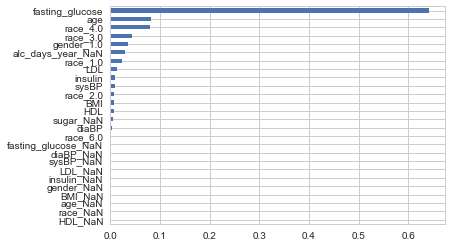

In [149]:
gbr=GradientBoostingClassifier()
gbr.fit(X_scaled_train_after,y_train_after)
feat_importances4 = pd.Series(gbr.feature_importances_, index=X_scaled_train_after.columns)
feat_importances4.sort_values(ascending=True).plot(kind='barh')
plt.show()

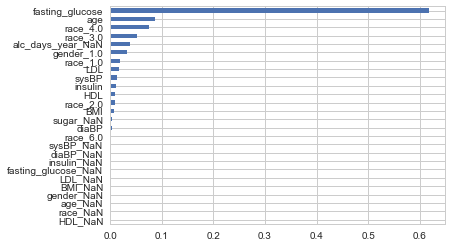

In [150]:
gbr=GradientBoostingClassifier()
gbr.fit(X_train_after,y_train_after)
feat_importances4 = pd.Series(gbr.feature_importances_, index=X_train_after.columns)
feat_importances4.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [151]:
gbrlog=["fasting_glucose","age","race_4.0","race_3.0","gender_1.0","alc_days_year_NaN"]

In [152]:
gbrknn=["fasting_glucose","age","race_4.0","race_3.0","gender_1.0","alc_days_year_NaN"]

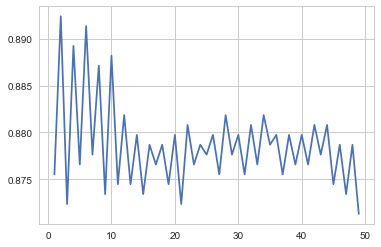

In [153]:
hp_rangeknn(gbrknn)

In [154]:
#kNN model fitting on the training set
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_scaled_train_after[gbrknn], y_train_after)
knn_pred_train = knn.predict(X_scaled_train_after[gbrknn])
knn_accuracy_train = accuracy_score(y_train_after, knn_pred_train)
print("The Training set accuracy of the kNN model is", knn_accuracy_train)

#Model performance on the Validation set
knn_pred_val = knn.predict(X_scaled_val[gbrknn])
knn_accuracy_val = accuracy_score(y_val, knn_pred_val)
print("The Validation set accuracy of the kNN model is", knn_accuracy_val)

#Model performance on the Test set
knn_pred_test = knn.predict(X_scaled_test[gbrknn])
knn_accuracy_test = accuracy_score(y_test, knn_pred_test)
print('Test set accuracy of the kNN model is',knn_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#knn_confusion = pd.crosstab(y_test, knn_pred_test)
#print(knn_confusion)
precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
knn_other_metrics = precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
print("The precision is", knn_other_metrics[0], "recall is", knn_other_metrics[1], "fscore is", knn_other_metrics[2])   

The Training set accuracy of the kNN model is 0.9644836272040302
The Validation set accuracy of the kNN model is 0.8924050632911392
Test set accuracy of the kNN model is 0.8944649446494465
The precision is 0.5135135135135135 recall is 0.5170068027210885 fscore is 0.5152542372881356


The Training set accuracy of the Logistic Regression model is 0.853904282115869
The Validation set accuracy of the Logistic Regression model is 0.8375527426160337
Test set accuracy of the Logistic Regression model is 0.8383763837638376
The precision is 0.38235294117647056 recall is 0.7959183673469388 fscore is 0.5165562913907285


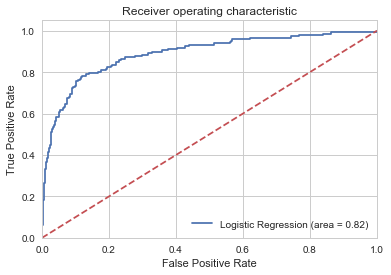

In [155]:
#Logistic regression with gradient boosting

chosen_vars = gbrlog
X_lr_train = X_train_after[chosen_vars]  
X_lr_test = X_test[chosen_vars]
X_lr_val = X_val[chosen_vars]

#Fitting the model on the training set and assessing the performance
logreg_model = logreg.fit(X_lr_train, y_train_after)
logreg_train = logreg.predict(X_lr_train)
logreg_accuracy_train = accuracy_score(y_train_after, logreg_train)
print("The Training set accuracy of the Logistic Regression model is", logreg_accuracy_train)

#Model performance on the Validation set
logreg_accuracy_val = logreg.predict(X_lr_val)
logreg_accuracy_val = accuracy_score(y_val, logreg_accuracy_val)
print("The Validation set accuracy of the Logistic Regression model is", logreg_accuracy_val)

#Model performance on the Test set
log_pred_test = logreg.predict(X_lr_test)
log_accuracy_test = accuracy_score(y_test, log_pred_test)
print('Test set accuracy of the Logistic Regression model is',log_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#logreg_confusion = pd.crosstab(y_test, log_pred_test)
#print(logreg_confusion)

lr_other_metrics = precision_recall_fscore_support(y_test, log_pred_test, average='binary')
print("The precision is", lr_other_metrics[0], "recall is", lr_other_metrics[1], "fscore is", lr_other_metrics[2])         


#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_lr_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_lr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# vif method

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [159]:
calculate_vif_(X_scaled_train_after)
vifknn=['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'insulin', 'BMI_NaN',
       'fasting_glucose_NaN', 'gender_NaN', 'LDL_NaN', 'HDL_NaN',
       'insulin_NaN', 'age_NaN', 'race_NaN', 'diaBP_NaN', 'alc_days_year_NaN',
       'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0',
       'gender_1.0']

dropping 'sysBP_NaN' at index: 17
dropping 'sysBP' at index: 6
dropping 'diaBP' at index: 6
dropping 'sugar_NaN' at index: 14
Remaining variables:
Index(['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'insulin', 'BMI_NaN',
       'fasting_glucose_NaN', 'gender_NaN', 'LDL_NaN', 'HDL_NaN',
       'insulin_NaN', 'age_NaN', 'race_NaN', 'diaBP_NaN', 'alc_days_year_NaN',
       'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0',
       'gender_1.0'],
      dtype='object')


In [160]:
calculate_vif_(X_train_after)
viflog=['insulin', 'BMI_NaN', 'fasting_glucose_NaN', 'gender_NaN', 'LDL_NaN',
       'HDL_NaN', 'insulin_NaN', 'age_NaN', 'race_NaN', 'diaBP_NaN',
       'alc_days_year_NaN', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0',
       'race_6.0', 'gender_1.0']

dropping 'sysBP_NaN' at index: 17
dropping 'sysBP' at index: 6
dropping 'diaBP' at index: 6
dropping 'BMI' at index: 0
dropping 'fasting_glucose' at index: 3
dropping 'HDL' at index: 0
dropping 'LDL' at index: 0
dropping 'age' at index: 0
dropping 'sugar_NaN' at index: 9
Remaining variables:
Index(['insulin', 'BMI_NaN', 'fasting_glucose_NaN', 'gender_NaN', 'LDL_NaN',
       'HDL_NaN', 'insulin_NaN', 'age_NaN', 'race_NaN', 'diaBP_NaN',
       'alc_days_year_NaN', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0',
       'race_6.0', 'gender_1.0'],
      dtype='object')


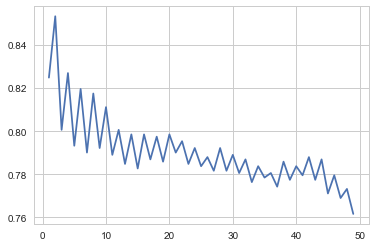

In [161]:
hp_rangeknn(vifknn)

In [162]:
#kNN model fitting on the training set
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_scaled_train_after[vifknn], y_train_after)
knn_pred_train = knn.predict(X_scaled_train_after[vifknn])
knn_accuracy_train = accuracy_score(y_train_after, knn_pred_train)
print("The Training set accuracy of the kNN model is", knn_accuracy_train)

#Model performance on the Validation set
knn_pred_val = knn.predict(X_scaled_val[vifknn])
knn_accuracy_val = accuracy_score(y_val, knn_pred_val)
print("The Validation set accuracy of the kNN model is", knn_accuracy_val)

#Model performance on the Test set
knn_pred_test = knn.predict(X_scaled_test[vifknn])
knn_accuracy_test = accuracy_score(y_test, knn_pred_test)
print('Test set accuracy of the kNN model is',knn_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#knn_confusion = pd.crosstab(y_test, knn_pred_test)
#print(knn_confusion)
precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
knn_other_metrics = precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
print("The precision is", knn_other_metrics[0], "recall is", knn_other_metrics[1], "fscore is", knn_other_metrics[2])     

The Training set accuracy of the kNN model is 0.9874055415617129
The Validation set accuracy of the kNN model is 0.8533755274261603
Test set accuracy of the kNN model is 0.8664206642066421
The precision is 0.4212962962962963 recall is 0.6190476190476191 fscore is 0.5013774104683195


The Training set accuracy of the Logistic Regression model is 0.5886649874055415
The Validation set accuracy of the Logistic Regression model is 0.6107594936708861
Test set accuracy of the Logistic Regression model is 0.6250922509225092
The precision is 0.15749525616698293 recall is 0.564625850340136 fscore is 0.24629080118694363


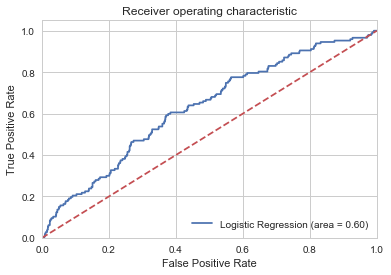

In [163]:
#Logistic regression with vif
from sklearn.feature_selection import RFE

chosen_vars = viflog
X_lr_train = X_train_after[chosen_vars]  
X_lr_test = X_test[chosen_vars]
X_lr_val = X_val[chosen_vars]

#Fitting the model on the training set and assessing the performance
logreg_model = logreg.fit(X_lr_train, y_train_after)
logreg_train = logreg.predict(X_lr_train)
logreg_accuracy_train = accuracy_score(y_train_after, logreg_train)
print("The Training set accuracy of the Logistic Regression model is", logreg_accuracy_train)

#Model performance on the Validation set
logreg_accuracy_val = logreg.predict(X_lr_val)
logreg_accuracy_val = accuracy_score(y_val, logreg_accuracy_val)
print("The Validation set accuracy of the Logistic Regression model is", logreg_accuracy_val)

#Model performance on the Test set
log_pred_test = logreg.predict(X_lr_test)
log_accuracy_test = accuracy_score(y_test, log_pred_test)
print('Test set accuracy of the Logistic Regression model is',log_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#logreg_confusion = pd.crosstab(y_test, log_pred_test)
#print(logreg_confusion)

lr_other_metrics = precision_recall_fscore_support(y_test, log_pred_test, average='binary')
print("The precision is", lr_other_metrics[0], "recall is", lr_other_metrics[1], "fscore is", lr_other_metrics[2])         


#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_lr_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_lr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Modelling

### Function to identify hyperparameter range

In [55]:
def hp_range(model, parameter):
    accuracy = []
    if model == 'random forest':
        if parameter == "trees":
            n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 100)]
            for i in n_estimators:
                rf = RandomForestClassifier(random_state = 42, criterion= 'gini', n_estimators = i)
                rf_new = rf.fit(X_train_after, y_train_after)
                rf_new_val = rf.predict(X_val)
                rf_accuracy_val = accuracy_score(y_val, rf_new_val)
                accuracy.append(rf_accuracy_val)
            plt.plot(n_estimators,accuracy)
            
        elif parameter == "features":
            max_features = list(range(1,X_train_after.shape[1]))
            for i in max_features:
                rf = RandomForestClassifier(random_state = 42, criterion= 'gini', max_features = i)
                rf_new = rf.fit(X_train_after, y_train_after)
                rf_new_val = rf.predict(X_val)
                rf_accuracy_val = accuracy_score(y_val, rf_new_val)
                accuracy.append(rf_accuracy_val)
            plt.plot(max_features,accuracy)
            
        elif parameter == "levels":
            max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
            for i in max_depth:
                rf = RandomForestClassifier(random_state = 42, criterion= 'gini', max_depth = i)
                rf_new = rf.fit(X_train_after, y_train_after)
                rf_new_val = rf.predict(X_val)
                rf_accuracy_val = accuracy_score(y_val, rf_new_val)
                accuracy.append(rf_accuracy_val)
            plt.plot(max_depth,accuracy)
            
        elif parameter == "samples_split":
            min_samples_split = [10,20,30,40,50]
            for i in min_samples_split:
                rf = RandomForestClassifier(random_state = 42, criterion= 'gini', min_samples_split = i)
                rf_new = rf.fit(X_train_after, y_train_after)
                rf_new_val = rf.predict(X_val)
                rf_accuracy_val = accuracy_score(y_val, rf_new_val)
                accuracy.append(rf_accuracy_val)
            plt.plot(min_samples_split,accuracy)
            
        elif parameter == "samples_leaf":
            min_samples_leaf = [10,20,30,40,50]
            for i in min_samples_leaf:
                rf = RandomForestClassifier(random_state = 42, criterion= 'gini', min_samples_leaf = i)
                rf_new = rf.fit(X_train_after, y_train_after)
                rf_new_val = rf.predict(X_val)
                rf_accuracy_val = accuracy_score(y_val, rf_new_val)
                accuracy.append(rf_accuracy_val)
            plt.plot(min_samples_leaf,accuracy)
            
    elif model == 'knn':
        k_range = list(range(1, 50))
        for i in k_range:
            knn = KNeighborsClassifier(n_neighbors=i)
            knn_new = knn.fit(X_scaled_train_after, y_train_after)
            knn_new_val = knn.predict(X_scaled_val)
            knn_accuracy_val = accuracy_score(y_val, knn_new_val)
            accuracy.append(knn_accuracy_val)
        plt.plot(k_range,accuracy)
        

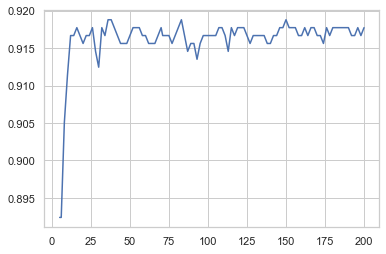

In [56]:
hp_range("random forest", 'trees')

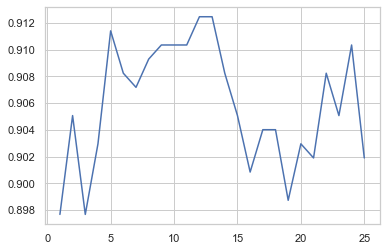

In [57]:
hp_range("random forest", 'features')

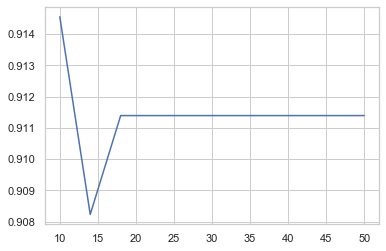

In [58]:
hp_range("random forest", 'levels')

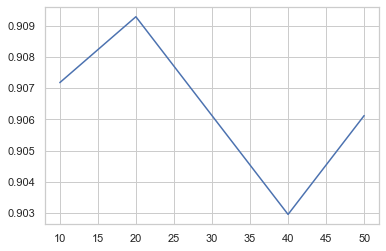

In [59]:
hp_range("random forest", 'samples_split') 

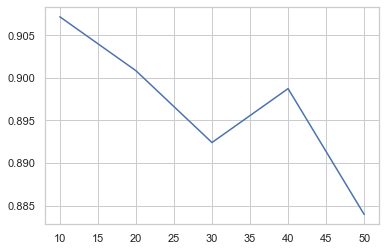

In [60]:
hp_range("random forest", 'samples_leaf') 

### Random Forest with Pipeline for SMOTE

In [61]:
from imblearn.pipeline import Pipeline

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 105, num = 50)]
# Number of features to consider at every split
max_features = list(range(1,X_train_before.shape[1]))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [10,20,30,40,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,40,50] 
# Method of selecting samples for training each tree
bootstrap = [True]
# Create  random grid
random_grid = {'clf_rf__n_estimators': n_estimators,
               'clf_rf__max_features': max_features,
               'clf_rf__max_depth': max_depth,
               'clf_rf__min_samples_split': min_samples_split,
               'clf_rf__min_samples_leaf': min_samples_leaf,
               'clf_rf__bootstrap': bootstrap}
rf = RandomForestClassifier(random_state = 42, criterion= 'gini')

pipeline = Pipeline([('smote', SMOTE(random_state=0)),
                     ('clf_rf', rf)])

rf_random = RandomizedSearchCV(pipeline, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_before, y_train_before)

estimators = rf_random.best_params_['clf_rf__n_estimators']
features = rf_random.best_params_['clf_rf__max_features']
depth = rf_random.best_params_['clf_rf__max_depth']
samples_split_min = rf_random.best_params_['clf_rf__min_samples_split']
samples_leaf_min = rf_random.best_params_['clf_rf__min_samples_leaf']


print("The best accuracy of", rf_random.best_score_, "from cross validation is given by", estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf parameters" )

rf_final = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  True , random_state=42, criterion= 'gini')   
rf_model = rf_final.fit(X_train_after, y_train_after)

rf_predictions_train = rf_final.predict(X_train_after)
rf_accuracy_train = accuracy_score(y_train_after, rf_predictions_train)
print("The Training set accuracy of the cross-validated random forest model is", rf_accuracy_train)

rf_predictions_val = rf_final.predict(X_val)
rf_accuracy_val = accuracy_score(y_val, rf_predictions_val)
print("The Validation set accuracy of the cross-validated random forest model is", rf_accuracy_val)

rf_predictions_test = rf_final.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
print("The Test set accuracy of the cross-validated random forest model is", rf_accuracy_test)

rf_other_metrics = precision_recall_fscore_support(y_test, rf_predictions_test, average='binary')
print("The precision is", rf_other_metrics[0], "recall is", rf_other_metrics[1], "fscore is", rf_other_metrics[2])         


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished


The best accuracy of 0.9163274536408865 from cross validation is given by 66 estimators 10 max features 27 max_depth 20 min samples split 10 min samples leaf parameters
The Training set accuracy of the cross-validated random forest model is 0.9639798488664988
The Validation set accuracy of the cross-validated random forest model is 0.9071729957805907
The Test set accuracy of the cross-validated random forest model is 0.8988929889298893
The precision is 0.5260416666666666 recall is 0.6870748299319728 fscore is 0.5958702064896755


### Boostrapping on the test set to determine RF performance

95.00 confidence interval 92.09% and 97.60%


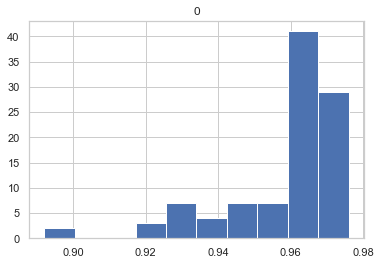

In [65]:
boot = pd.merge(y_test, X_test, left_index=True, right_index=True)
boot.rename(columns = {'Actual':'diabetes'}, inplace = True) 
n_iterations = 100
stats = list()
for i in range(n_iterations):
    boot = resample(boot, replace=True, n_samples=500,random_state=15 )
    boot_test_y = boot.loc[:, boot.columns == 'diabetes']
    boot_test_X = boot.loc[:, boot.columns != 'diabetes']    
    rf_final = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  True, random_state=42, criterion= 'gini')   
    rf_model = rf_final.fit(X_train_after, y_train_after)
    rf_predictions_boot = rf_final.predict(boot_test_X)
    score = accuracy_score(boot_test_y, rf_predictions_boot)
    stats.append(score)
hist = pd.DataFrame(stats).hist()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.2f confidence interval %.2f%% and %.2f%%' % (alpha*100, lower*100, upper*100))
    

### Logistic Regression

20 features are chosen through RFE and they are ['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'diaBP', 'BMI_NaN', 'fasting_glucose_NaN', 'LDL_NaN', 'insulin_NaN', 'sugar_NaN', 'sysBP_NaN', 'diaBP_NaN', 'alc_days_year_NaN', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0', 'gender_1.0']
The Training set accuracy of the Logistic Regression model is 0.8664987405541562
The Validation set accuracy of the Logistic Regression model is 0.8491561181434599
Test set accuracy of the Logistic Regression model is 0.844280442804428
The precision is 0.391156462585034 recall is 0.782312925170068 fscore is 0.5215419501133787


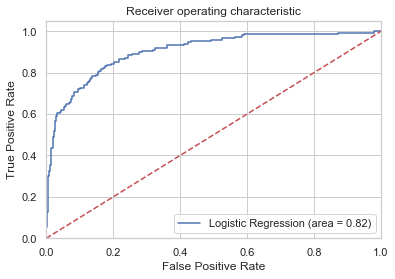

In [66]:
#Logistic regression with Recursive Feature Elimination
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg,20)
rfe = rfe.fit(X_train_after, y_train_after)
chosen_vars = []
for i in range(len(rfe.support_)):
    if rfe.support_[i] == True:
        chosen_vars.append(X_train_after.columns[i])
print(len(chosen_vars), "features are chosen through RFE and they are", chosen_vars)
X_lr_train = X_train_after[chosen_vars]  
X_lr_test = X_test[chosen_vars]
X_lr_val = X_val[chosen_vars]

#Fitting the model on the training set and assessing the performance
logreg_model = logreg.fit(X_lr_train, y_train_after)
logreg_train = logreg.predict(X_lr_train)
logreg_accuracy_train = accuracy_score(y_train_after, logreg_train)
print("The Training set accuracy of the Logistic Regression model is", logreg_accuracy_train)

#Model performance on the Validation set
logreg_accuracy_val = logreg.predict(X_lr_val)
logreg_accuracy_val = accuracy_score(y_val, logreg_accuracy_val)
print("The Validation set accuracy of the Logistic Regression model is", logreg_accuracy_val)

#Model performance on the Test set
log_pred_test = logreg.predict(X_lr_test)
log_accuracy_test = accuracy_score(y_test, log_pred_test)
print('Test set accuracy of the Logistic Regression model is',log_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#logreg_confusion = pd.crosstab(y_test, log_pred_test)
#print(logreg_confusion)

lr_other_metrics = precision_recall_fscore_support(y_test, log_pred_test, average='binary')
print("The precision is", lr_other_metrics[0], "recall is", lr_other_metrics[1], "fscore is", lr_other_metrics[2])         


#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_lr_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_lr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


### kNN 

### Scree Plot to decide Hyperparameter range 

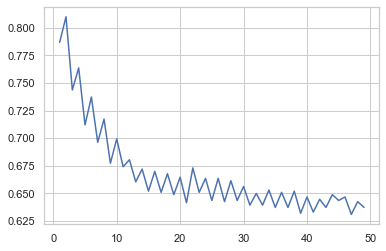

In [67]:
hp_range("knn", None)

In [68]:
#kNN model fitting on the training set
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_scaled_train_after, y_train_after)
knn_pred_train = knn.predict(X_scaled_train_after)
knn_accuracy_train = accuracy_score(y_train_after, knn_pred_train)
print("The Training set accuracy of the kNN model is", knn_accuracy_train)

#Model performance on the Validation set
knn_pred_val = knn.predict(X_scaled_val)
knn_accuracy_val = accuracy_score(y_val, knn_pred_val)
print("The Validation set accuracy of the kNN model is", knn_accuracy_val)

#Model performance on the Test set
knn_pred_test = knn.predict(X_scaled_test)
knn_accuracy_test = accuracy_score(y_test, knn_pred_test)
print('Test set accuracy of the kNN model is',knn_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
#knn_confusion = pd.crosstab(y_test, knn_pred_test)
#print(knn_confusion)
precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
knn_other_metrics = precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
print("The precision is", knn_other_metrics[0], "recall is", knn_other_metrics[1], "fscore is", knn_other_metrics[2])         


The Training set accuracy of the kNN model is 0.9876574307304786
The Validation set accuracy of the kNN model is 0.810126582278481
Test set accuracy of the kNN model is 0.796309963099631
The precision is 0.16230366492146597 recall is 0.2108843537414966 fscore is 0.1834319526627219


### kNN Cross-Validation for Hyperparameter tuning (Need to do a pipeline)

In [172]:
#kNN grid search for choice of best cluster size
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled_train_after, y_train_after)
k = grid.best_params_["n_neighbors"]
print("The best accuracy of", grid.best_score_, "is given by", k, "clusters")

#kNN model fitting on the training set
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_scaled_train_after, y_train_after)
knn_pred_train = knn.predict(X_scaled_train_after)
knn_accuracy_train = accuracy_score(y_train_after, knn_pred_train)
print("The Training set accuracy of the kNN model is", knn_accuracy_train)

#Model performance on the Validation set
knn_pred_val = knn.predict(X_scaled_val)
knn_accuracy_val = accuracy_score(y_val, knn_pred_val)
print("The Validation set accuracy of the kNN model is", knn_accuracy_val)

#Model performance on the Test set
knn_pred_test = knn.predict(X_scaled_test)
knn_accuracy_test = accuracy_score(y_test, knn_pred_test)
print('Test set accuracy of the kNN model is',knn_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
knn_confusion = pd.crosstab(y_test, knn_pred_test)
print(knn_confusion)
precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
knn_other_metrics = precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
print("The precision is", knn_other_metrics[0], "recall is", knn_other_metrics[1], "fscore is", knn_other_metrics[2])         


The best accuracy of 0.9035264483627204 is given by 2 clusters
The Training set accuracy of the kNN model is 0.9876574307304786
The Validation set accuracy of the kNN model is 0.810126582278481
Test set accuracy of the kNN model is 0.796309963099631


ValueError: Shape of passed values is (1, 2), indices imply (1355, 2)

### Lasso CV

In [55]:
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(pd.Series(lasso.coef_, index=X.columns))
coeff = np.sum(lasso.coef_!=0)
print ("number of features used: ", coeff) 
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
print("training score:", train_score ) 
print ("test score: ", test_score)
print(lassocv.alpha_)

BMI                    2.141239e-01
HDL                   -2.567128e-01
LDL                   -9.546568e-02
age                    8.202737e-03
fasting_glucose        1.025409e+00
insulin               -1.894985e-02
sysBP                 -6.697068e-02
diaBP                  1.961547e-03
BMI_NaN               -7.072136e-02
fasting_glucose_NaN    2.536551e-01
gender_NaN             0.000000e+00
LDL_NaN               -2.055534e-02
HDL_NaN                0.000000e+00
insulin_NaN           -3.647852e-02
age_NaN                0.000000e+00
race_NaN               0.000000e+00
sugar_NaN              3.544687e-02
sysBP_NaN              3.554791e-03
diaBP_NaN              3.341392e-17
alc_days_year_NaN      1.900270e-02
race_1.0               3.276483e-02
race_2.0              -2.442358e-02
race_3.0              -6.095231e-02
race_4.0               1.150339e-01
race_6.0               0.000000e+00
race_7.0              -7.198821e-02
gender_1.0            -7.177389e-02
gender_2.0             1.237

### Lasso and LR

In [169]:
C = [1.4154569084153052e-05,50,10, 1, .1, .001]

#LassoCV + LR model fitting on the training set
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train_after, y_train_after)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    coeff = np.sum(clf.coef_!=0)
    print('Number of coeff:', coeff)

    print('Training accuracy:  {0:.3f}'.format(clf.score(X_train_after, y_train_after)))
    print('Test accuracy:  {0:.3f}'.format(clf.score(X_test, y_test)))
    print('')

    
clf = LogisticRegression(penalty='l1', C=10, solver='liblinear')
clf.fit(X_train_after, y_train_after)
ls_pred_train = clf.predict(X_train_after)
ls_accuracy_train = accuracy_score(y_train_after, ls_pred_train)
print("The Training set accuracy of the Lasso CV for LR model is  {0:.3f}".format(ls_accuracy_train))

# LassoCV + LR Model performance on the Validation set
ls_pred_val = clf.predict(X_val)
ls_accuracy_val = accuracy_score(y_val, ls_pred_val)
print("The Validation set accuracy of the Lasso CV for LR model is {0:.3f}".format(ls_accuracy_val))

#LassoCV + LR Model performance on the Test set
ls_pred_test = clf.predict(X_test)
ls_accuracy_test = accuracy_score(y_test, ls_pred_test)
print('Test set accuracy of the Lasso CV for LR model is  {0:.3f}'.format(ls_accuracy_test ))


#Confusion Matrix and other metrics (Precision, Recall and Fscore)
ls_confusion_test = pd.crosstab(y_test, ls_pred_test)
print(ls_confusion_test)
precision_recall_fscore_support(y_test, ls_pred_test, average='binary')
ls_other_metrics = precision_recall_fscore_support(y_test, ls_pred_test, average='binary')
print("The precision is  {0:.3f}".format(ls_other_metrics[0]) , "recall is {0:.3f} ".format(ls_other_metrics[1]), "fscore is {0:.3f}".format(ls_other_metrics[2]))         


C: 1.4154569084153052e-05
Coefficient of each feature: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Number of coeff: 0
Training accuracy:  0.500
Test accuracy:  0.892

C: 50
Coefficient of each feature: [[ 4.70406516e-02 -1.09330405e+00 -6.30632946e-01  7.39134393e-02
   1.30365468e+00 -1.15391708e-03 -5.31662573e-03  2.91958889e-02
  -1.10561764e+00  9.14321004e-01  0.00000000e+00 -2.32433814e-01
   0.00000000e+00  2.23305778e-01  0.00000000e+00  0.00000000e+00
  -5.55217520e-01  5.93197826e-02  8.36281309e-03  3.04064947e-01
   1.04180165e+00  4.65097642e-01 -4.43223418e-01  1.62490235e+00
   6.19819198e-01 -3.23616559e-01]]
Number of coeff: 22
Training accuracy:  0.872
Test accuracy:  0.845

C: 10
Coefficient of each feature: [[ 4.68513954e-02 -1.09200743e+00 -6.30627494e-01  7.38263589e-02
   1.30116586e+00 -1.14615172e-03 -5.35802547e-03  2.90959654e-02
  -1.06708102e+00  7.93588826e-01  0.00000000e+00 -2.31004156e-01
   0.00000000e+00  2.042

ValueError: Shape of passed values is (1, 2), indices imply (1355, 2)

In [166]:
C = [1.4154569084153052e-05,50,10, 1, .1, .001]

#LassoCV + LR model fitting on the training set
for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(X_train_after, y_train_after)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    coeff = np.sum(clf.coef_!=0)
    print('Number of coeff:', coeff)

    print('Training accuracy:  {0:.3f}'.format(clf.score(X_train_after, y_train_after)))
    print('Test accuracy:  {0:.3f}'.format(clf.score(X_test, y_test)))
    print('')

    
clf = LogisticRegression(penalty='l2', C=10, solver='liblinear')
clf.fit(X_train_after, y_train_after)
ls_pred_train = clf.predict(X_train_after)
ls_accuracy_train = accuracy_score(y_train_after, ls_pred_train)
print("The Training set accuracy of the Ridge CV for LR model is  {0:.3f}".format(ls_accuracy_train))

# LassoCV + LR Model performance on the Validation set
ls_pred_val = clf.predict(X_val)
ls_accuracy_val = accuracy_score(y_val, ls_pred_val)
print("The Validation set accuracy of the Ridge CV for LR model is {0:.3f}".format(ls_accuracy_val))

#LassoCV + LR Model performance on the Test set
ls_pred_test = clf.predict(X_test)
ls_accuracy_test = accuracy_score(y_test, ls_pred_test)
print('Test set accuracy of the Ridge CV for LR model is  {0:.3f}'.format(ls_accuracy_test ))


#Confusion Matrix and other metrics (Precision, Recall and Fscore)
ls_confusion_test = pd.crosstab(y_test, ls_pred_test)
print(ls_confusion_test)
precision_recall_fscore_support(y_test, ls_pred_test, average='binary')
ls_other_metrics = precision_recall_fscore_support(y_test, ls_pred_test, average='binary')
print("The precision is  {0:.3f}".format(ls_other_metrics[0]) , "recall is {0:.3f} ".format(ls_other_metrics[1]), "fscore is {0:.3f}".format(ls_other_metrics[2]))         


C: 1.4154569084153052e-05
Coefficient of each feature: [[-6.62625329e-04 -3.30506668e-03 -6.11597795e-03  4.26144105e-02
   1.52821397e-02  6.16272118e-03 -1.26089924e-02 -1.76747038e-02
  -6.97761313e-05  4.57899862e-05  0.00000000e+00  4.53575832e-05
   0.00000000e+00 -8.67445833e-05  0.00000000e+00  0.00000000e+00
  -1.07361755e-03  7.25087408e-05  7.25087408e-05  2.47080878e-04
   4.31143450e-04 -1.48601817e-04 -1.74973067e-03  6.32029157e-04
  -3.82148370e-05  5.07640559e-04]]
Number of coeff: 22
Training accuracy:  0.726
Test accuracy:  0.680

C: 50
Coefficient of each feature: [[ 4.67736728e-02 -1.09698011e+00 -6.34579357e-01  7.38472155e-02
   1.30133952e+00 -1.13601112e-03 -5.39160665e-03  2.91242159e-02
  -1.09703666e+00  7.63020446e-01  0.00000000e+00 -2.49605593e-01
   0.00000000e+00  2.25543106e-01  0.00000000e+00  0.00000000e+00
  -5.59351177e-01  3.48089829e-02  3.48089829e-02  3.04152656e-01
   1.02481326e+00  4.49629498e-01 -4.59145398e-01  1.61006856e+00
   6.05595314

ValueError: Shape of passed values is (1, 2), indices imply (1355, 2)

### Gradient Boosting

In [170]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=25, max_depth=5, random_state=0)
    gb_clf.fit(X_train_after, y_train_after)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_after, y_train_after)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=25, max_depth=5, random_state=0)
gb_clf.fit(X_train_after, y_train_after)   
gb_pred_test = gb_clf.predict(X_test)
    
gb_confusion_test = pd.crosstab(y_test, gb_pred_test)
print(gb_confusion_test)
precision_recall_fscore_support(y_test, gb_pred_test, average='binary')
gb_other_metrics = precision_recall_fscore_support(y_test, gb_pred_test, average='binary')
print("The precision is  {0:.3f}".format(gb_other_metrics[0]) , "recall is {0:.3f} ".format(gb_other_metrics[1]), "fscore is {0:.3f}".format(gb_other_metrics[2]))         


Learning rate:  0.05
Accuracy score (training): 0.948
Accuracy score (validation): 0.912
Accuracy score (test): 0.897
Learning rate:  0.075
Accuracy score (training): 0.958
Accuracy score (validation): 0.915
Accuracy score (test): 0.900
Learning rate:  0.1
Accuracy score (training): 0.965
Accuracy score (validation): 0.915
Accuracy score (test): 0.906
Learning rate:  0.25
Accuracy score (training): 0.985
Accuracy score (validation): 0.915
Accuracy score (test): 0.912
Learning rate:  0.5
Accuracy score (training): 0.996
Accuracy score (validation): 0.910
Accuracy score (test): 0.911
Learning rate:  0.75
Accuracy score (training): 0.998
Accuracy score (validation): 0.908
Accuracy score (test): 0.903
Learning rate:  1
Accuracy score (training): 0.999
Accuracy score (validation): 0.892
Accuracy score (test): 0.894


ValueError: Shape of passed values is (1, 2), indices imply (1355, 2)

### Bootstrapping on the test set

####Need to complete####

### Random Forest on Scaled Numerical Features